<a href="https://colab.research.google.com/github/alessioborgi/MNLP/blob/main/Fine_Tuned_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINE TUNED TRANSFORMER

***HOW TO: READ CAREFULLY EVERYTHING***

The notebook is structured in the following way:
- **1 - DATA ENHANCEMENT,FINAL MODEL,FINAL TRAINING AND FINAL TESTING:** This big section contains all the process devoted to the enhancement of the dataset, the definition of the final model ,the relative training and the final testing.
  - **HOW TO USE IT:** You just have to follow the workflow of the cell.You will wait more than 4h for the enhancement, about 50 min for the training and a couple of minutes for the testing.
- **2 - EXPERIMENTAL & JOURNEY TOWARDS THE FINAL SOLUTION:**  This big section contains all the experiments and comparisons we have been gone through.
  - **HOW TO USE IT:** This should **not be runned** ,unless you want to go trough the whole experimental journey(around 50 min for every trial).
- **3 - DIRECT FINAL TESTING:** This section is for the final testing, you will find again the importing of the libraries and some redundant functions, in order to allow a third user a direct testing (without running the other 2 big section).

  - **HOW TO USE IT:** This **MUST** be runned. In this way you will find the csv output directly on the shared folder.

**IMPORTANT INSTRUCTIONS ON HOW TO USE THE 3 SECTIONS**

  As you can see you have two options in order **to use and test the code**:

- **1- DIRECTLY RUN SECTION 3:** The first and **strongly suggested** option is to directly run section 3,you will have our model already trained(imported from our hugging face repo) and the datasets already enhanced (imported from the shared folder),so you can directly test in a couple of minutes.

   **OR**

- **2- RUN SECTION 1:** The second option is that you can do the enhancement, the training and the testing by yourslef (more than 5 hours in total) running section 1. The new model trained by you will overwrite our local copy in the shared folder.

**CONTACTS**

@ Alessio Borgi - 1952442 - borgi.1952442@studenti.uniroma1.it

@ Stefano Previti - 2151985 - previti.2151985@studenti.uniroma1.it

## 1: DATA ENHANCEMENT,FINAL MODEL, FINAL TRAINING AND FINAL TESTING


### 1.0: IMPORTING LIBRARIES

In [ ]:
!pip install requests wikidata wikipedia-api wptools networkx matplotlib torch torch-geometric sentence-transformers datasets

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.4 MB/s eta 0:00:00
   ━

In [ ]:
!pip install accelerate -U
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install nltk safetensors

In [ ]:
### LIBRARIES NECESSARY FROM STEP 0 ON ###
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset, Dataset
import huggingface_hub


# Only necessary if you take the dataset from the drive instead from HuggingFace.
from google.colab import drive
drive.mount('/content/drive')

### LIBRARIES NECESSARY FROM STEP 1 ON ###
import json
import pprint
import wptools
import requests
import wikipediaapi
from wikidata.client import Client
from urllib.parse import urlparse, unquote
import re
import time
import random

### LIBRARIES NECESSARY FROM STEP 2 ON ###
from collections import Counter
import os
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification,DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
import numpy as np
from evaluate import load
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt_tab')

### LIBRARIES NECESSARY FROM STEP 3 ON ###
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from safetensors.torch import load_file



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### 1.0.5: TRAINING SET LOADING, INSPECTION & DISCOVERY

#### 1.0.5: OLD-VERSION (DATASET)

##### 1.0.5.0: SETUP STEP

In [ ]:
### SETUP STEP ###
file_path = '/content/drive/MyDrive/BorgiPreviti/old_dataset.tsv'

In [ ]:
# 1) Load the TSV file into a Pandas DataFrame.
df = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')
df.head()


,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q306,Sebastián Piñera,Chilean entrepreneur and politician (1949–2024),entity,politics,politician,cultural exclusive
1,http://www.wikidata.org/entity/Q12735,John Amos Comenius,"Czech teacher, educator, philosopher and write...",entity,politics,politician,cultural representative
2,http://www.wikidata.org/entity/Q1752,Macrinus,Roman emperor from 217 to 218,entity,politics,politician,cultural representative
3,http://www.wikidata.org/entity/Q1639,Lamine Diack,Senegalese sports manager (1933–2021),entity,politics,politician,cultural representative
4,http://www.wikidata.org/entity/Q9588,Richard Nixon,President of the United States from 1969 to 1974,entity,politics,politician,cultural representative


##### 1.0.5.1: NaN LABEL PRESENCE

In [ ]:
def check_nan_labels(df):
    ''' Util function to check nan label presence. '''

    # 1) Count missing values per column and print them out.
    print("=== NaN LABEL PRESENCE ===")
    missing_counts = df.isnull().sum()
    total_missing = missing_counts.sum()
    print(f"Total missing values in the DataFrame: {total_missing}\n")
    print("Missing values by column:")
    print(missing_counts)
    print("\nRows with missing values and the respective columns:")
    for idx, row in df.iterrows():
        missing_cols = row[row.isnull()].index.tolist()
        if missing_cols:
            print(f"Row {idx}: {missing_cols}")

    # 2) SOLUTION ADOPTED: Drop the rows containing NaN.
    print("DataFrame shape before dropping rows with NaN:", df.shape)
    df = df.dropna()
    print("DataFrame shape after dropping rows with NaN:", df.shape)
    print("====== END =====\n")
    return df

df = check_nan_labels(df)

=== NaN LABEL PRESENCE ===
Total missing values in the DataFrame: 7

Missing values by column:
item           0
name           0
description    0
type           0
category       0
subcategory    0
label          7
dtype: int64

Rows with missing values and the respective columns:
Row 1214: ['label']
Row 1651: ['label']
Row 2831: ['label']
Row 3236: ['label']
Row 4853: ['label']
Row 5885: ['label']
Row 6063: ['label']
DataFrame shape before dropping rows with NaN: (6251, 7)
DataFrame shape after dropping rows with NaN: (6244, 7)
====== END =====



##### 1.0.5.2: LABEL INCONSISTENCIES

In [ ]:
def check_labels_inconsistencies(df):
    ''' Utils function to check whether the labels present inconsistencies. '''

    print("=== LABEL INCONSISTENCIES PRESENCE ===")
    # 1) Label Inconsistencies discovery.
    print("Original unique labels:")
    print(set(df["label"].dropna().unique()))

    # Make a copy of the DataFrame to avoid SettingWithCopyWarning.
    df_clean = df.copy()

    # 2) Define the mapping for substitutions and replace labels.
    mapping = {
        "cultural agn": "cultural agnostic",
        "cultural ag": "cultural agnostic",
        "cultural represent": "cultural representative",
        "cultural ex": "cultural exclusive"
    }

    df_clean.loc[:, "label"] = df_clean["label"].replace(mapping)

    # 3) Drop the ambiguous rows.
    drop_set = {"cultural", "cult"}
    print("DataFrame shape before dropping rows with ambiguous labels:", df_clean.shape)
    df_clean = df_clean[~df_clean["label"].isin(drop_set)]
    print("DataFrame shape after dropping rows with ambiguous labels:", df_clean.shape)

    valid_labels = {"cultural exclusive", "cultural representative", "cultural agnostic"}
    df_clean = df_clean[df_clean["label"].isin(valid_labels)]

    print("\nUnique labels after cleaning:")
    print(set(df_clean["label"].unique()))
    df = df_clean.copy()
    print("====== END =====\n")
    return df

df = check_labels_inconsistencies(df)


=== LABEL INCONSISTENCIES PRESENCE ===
Original unique labels:
{'cultural agnostic', 'cult', 'cultural ag', 'cultural ex', 'cultural representative', 'cultural agn', 'cultural exclusive', 'cultural represent', 'cultural'}
DataFrame shape before dropping rows with ambiguous labels: (6244, 7)
DataFrame shape after dropping rows with ambiguous labels: (6238, 7)

Unique labels after cleaning:
{'cultural representative', 'cultural agnostic', 'cultural exclusive'}
====== END =====



##### 1.0.5.3: CLASS IMBALANCE


Label Counts:
label
cultural exclusive         2686
cultural agnostic          1866
cultural representative    1686
Name: count, dtype: int64


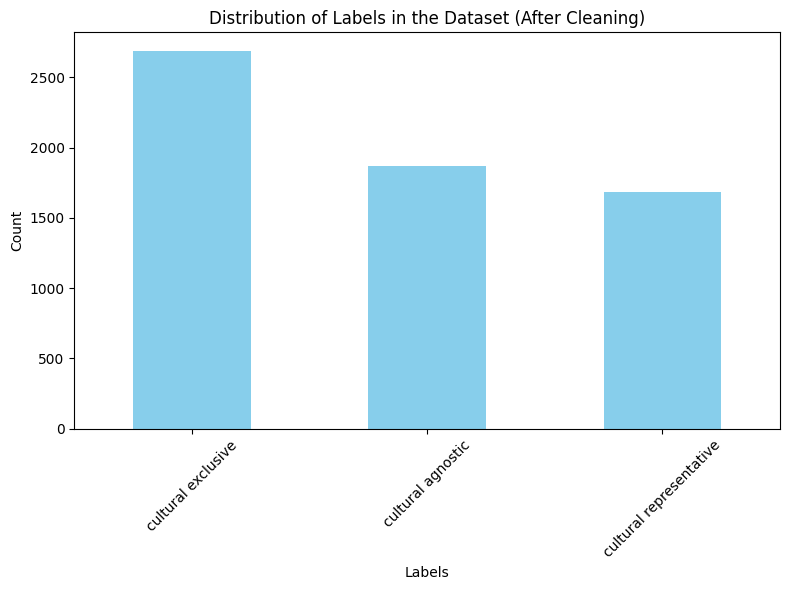

In [ ]:
def visualize_class_imbalance(df):
    ''' Utils function to visualize the Class Imbalance Distribution with a Histogram. '''
    # 1) Count the occurrences of each label.
    label_counts = df["label"].value_counts()
    print("\nLabel Counts:")
    print(label_counts)

    # 2) Visualize the label distribution.
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Distribution of Labels in the Dataset (After Cleaning)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_class_imbalance(df)

##### 1.0.5.4: DUPLICATES DISCOVERY

In [ ]:
def check_duplicates(df):
    ''' Utils function to check for duplicates. '''
    # Check for duplicates in the "name" column.
    duplicate_mask = df["name"].duplicated(keep=False)
    duplicates = df.loc[duplicate_mask, "name"].unique()
    print("Cells that are not unique in column 'name':")
    print(duplicates)

check_duplicates(df)

Cells that are not unique in column 'name':
['prefect' 'Pirate Party' 'Socialist Party' 'central government'
 'Breithorn' 'Alexandria']


##### 1.0.5.5: CLEANED DATASET INFORMATION


In [ ]:
# 1) Display basic DF information.
print("=== DataFrame Info ===")
df.info()


=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 6238 entries, 0 to 6250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item         6238 non-null   object
 1   name         6238 non-null   object
 2   description  6238 non-null   object
 3   type         6238 non-null   object
 4   category     6238 non-null   object
 5   subcategory  6238 non-null   object
 6   label        6238 non-null   object
dtypes: object(7)
memory usage: 389.9+ KB


In [ ]:
# 2) Display DF Staistics.
print("\n=== DataFrame Statistics===")
print(df.describe())


=== DataFrame Statistics===
                                         item                name description  \
count                                    6238                6238        6238   
unique                                   6238                6232        5659   
top     http://www.wikidata.org/entity/Q67094  central government  film genre   
freq                                        1                   2          32   

          type  category subcategory               label  
count     6238      6238        6238                6238  
unique       2        19         108                   3  
top     entity  politics  politician  cultural exclusive  
freq      3919       532          99                2686  


In [ ]:
# 3) Check for duplicate rows
duplicate_mask = df.duplicated()
num_duplicates = duplicate_mask.sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows:")
    print(df[duplicate_mask])

# (DUPLICATES NOT PRESENT) !

Number of duplicate rows: 0


In [ ]:
# 4) Checking that we have really 19 categories, and also checking the according subcategories.
unique_categories = df["category"].unique()
unique_subcategories = df["subcategory"].unique()

print("Unique Categories:")
print(unique_categories)
print(len(unique_categories))
print("\nUnique Subcategories:")
print(unique_subcategories)
print(len(unique_subcategories))



Unique Categories:
['politics' 'food' 'architecture' 'transportation' 'sports' 'media'
 'philosophy and religion' 'literature' 'visual arts' 'fashion'
 'comics and anime' 'performing arts' 'music' 'films' 'books' 'history'
 'gestures and habits' 'biology' 'geography']
19

Unique Subcategories:
['politician' 'political party' 'government agency' 'law' 'policy'
 'government' 'food' 'drink' 'dish' 'ingredient' 'cook'
 'cooking technique' 'architectural structure' 'architectural style'
 'architect' 'construction' 'building' 'building material'
 'transport company' 'automobile manufacturer' 'transport'
 'mode of transport' 'station' 'athlete' 'sports team' 'sport'
 'sports club' 'recurring sporting event' 'sports equipment'
 'media company' 'magazine' 'television' 'production company'
 'film studio' 'streaming service' 'philosopher' 'religious leader'
 'religion' 'philosophy' 'philosophical movement' 'religious movement'
 'poetry' 'poet' 'writing style' 'literary genre' 'literary award'
 'w

In [ ]:
# 5) Category-SubCategories Dictionary construction.
cat_subcat_dict = df.groupby("category")["subcategory"].unique().to_dict()

print("Categories and their subcategories:")
for cat, subcats in cat_subcat_dict.items():
    print(f"Category: {cat} -> Subcategories: {list(subcats)} (Count: {len(subcats)})")

Categories and their subcategories:
Category: architecture -> Subcategories: ['architectural structure', 'architectural style', 'architect', 'construction', 'building', 'building material'] (Count: 6)
Category: biology -> Subcategories: ['organism', 'biologist', 'animal', 'tree', 'plant', 'fish'] (Count: 6)
Category: books -> Subcategories: ['book', 'bookstore', 'non-fiction writer'] (Count: 3)
Category: comics and anime -> Subcategories: ['comics', 'comics artist', 'manga', 'animated film', 'animation technique', 'animation studio'] (Count: 6)
Category: fashion -> Subcategories: ['clothing', 'traditional costume', 'designer', 'fashion trend', 'textile', 'model'] (Count: 6)
Category: films -> Subcategories: ['film', 'film festival', 'film director', 'film producer', 'film genre'] (Count: 5)
Category: food -> Subcategories: ['food', 'drink', 'dish', 'ingredient', 'cook', 'cooking technique'] (Count: 6)
Category: geography -> Subcategories: ['geographic location', 'environment', 'mountai


Counts for each Category:
category
politics                   532
sports                     428
geography                  408
philosophy and religion    394
architecture               394
literature                 362
music                      348
food                       345
fashion                    319
visual arts                312
comics and anime           311
history                    304
media                      285
biology                    285
performing arts            275
films                      269
gestures and habits        259
transportation             217
books                      191
Name: count, dtype: int64

Counts for each Subcategory:
subcategory
politician           99
law                  95
film                 95
government agency    94
ritual               94
                     ..
environment           5
writing style         4
cooking technique     4
fashion trend         4
body language         1
Name: count, Length: 108, dtype: int64


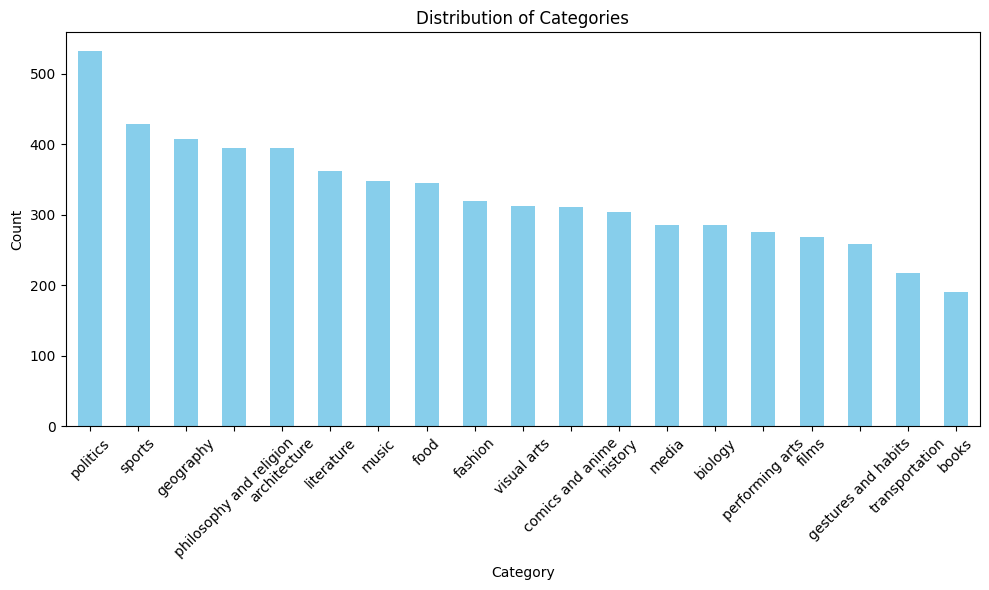

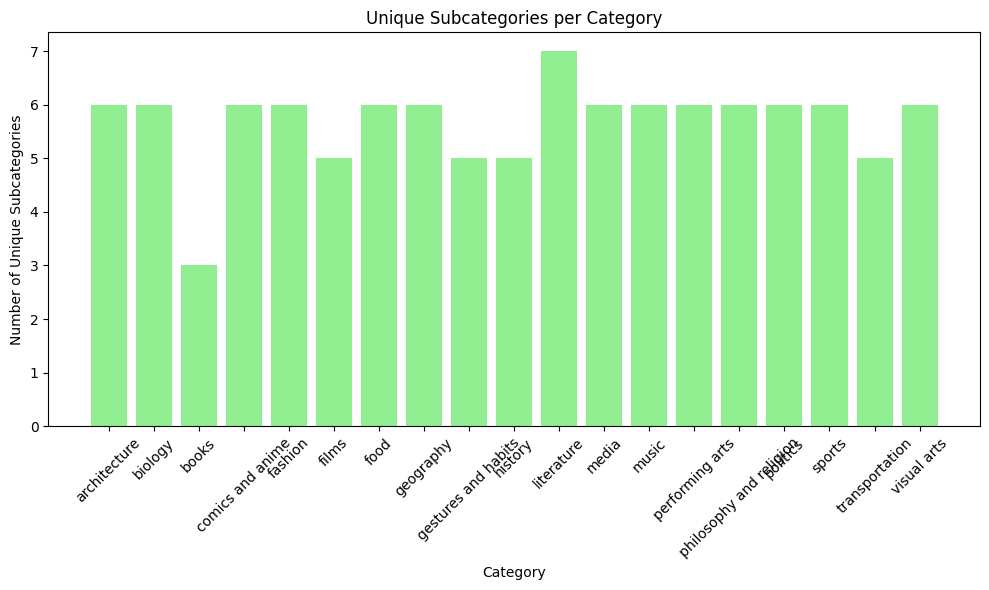

In [ ]:
# 6) Additionally, print counts of entries for each category.
category_counts = df["category"].value_counts()
print("\nCounts for each Category:")
print(category_counts)

# And for each subcategory
subcategory_counts = df["subcategory"].value_counts()
print("\nCounts for each Subcategory:")
print(subcategory_counts)

# Visualize the distribution of the main categories.
category_counts = df["category"].value_counts()
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the number of unique subcategories for each main category.
subcat_counts = {cat: len(subcats) for cat, subcats in cat_subcat_dict.items()}
plt.figure(figsize=(10,6))
plt.bar(subcat_counts.keys(), subcat_counts.values(), color='lightgreen')
plt.xlabel("Category")
plt.ylabel("Number of Unique Subcategories")
plt.title("Unique Subcategories per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1.0.5.6: SAVE MODIFIED DATAFRAME (CSV)

In [ ]:
df.to_csv("dataframe.csv", index=False)

#### 1.0.5: NEW VERSION (DATASET)

##### 1.0.5.0: SETUP STEP

In [ ]:
huggingface_hub.login()

# Login beforehand using huggingface-cli login if necessary.
ds = load_dataset("sapienzanlp/nlp2025_hw1_cultural_dataset")
train_data = ds["train"]
validation_data = ds["validation"]

# Create Pandas Dataframes just for better analysis.
train_df = train_data.to_pandas()
validation_df = validation_data.to_pandas()


In [ ]:
# Test set in Pandas Dataframe.
file_path = '/content/drive/MyDrive/BorgiPreviti/test_unlabeled.csv'
test_df = pd.read_csv(file_path)

In [ ]:
train_df.head()

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q32786,916,2012 film by M. Mohanan,entity,films,film,cultural exclusive
1,http://www.wikidata.org/entity/Q371,!!!,American dance-punk band from California,entity,music,musical group,cultural representative
2,http://www.wikidata.org/entity/Q3729947,¡Soborno!,Mort & Phil comic,entity,comics and anime,comics,cultural representative
3,http://www.wikidata.org/entity/Q158611,+44,American band,entity,music,musical group,cultural representative
4,http://www.wikidata.org/entity/Q280375,1 Monk Street,"building in Monmouth, Wales",entity,architecture,building,cultural exclusive


In [ ]:
validation_df.head()

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q15786,1. FC Nürnberg,"German sports club based in Nuremberg, Bavaria",entity,sports,sports club,cultural representative
1,http://www.wikidata.org/entity/Q268530,77 Records,UK record label,entity,music,record label,cultural exclusive
2,http://www.wikidata.org/entity/Q216153,A Bug's Life,1998 animated film directed by John Lasseter a...,entity,comics and anime,animated film,cultural representative
3,http://www.wikidata.org/entity/Q593,A Gang Story,2011 film by Olivier Marchal,entity,films,film,cultural exclusive
4,http://www.wikidata.org/entity/Q192185,Aaron Copland,"American composer, composition teacher, writer...",entity,performing arts,choreographer,cultural representative


In [ ]:
test_df.head()

,item,name,description,type,category,subcategory
0,http://www.wikidata.org/entity/Q2427430,Northeast Flag Replacement,Zhang Xueliang's announcement on 29 December 1...,concept,History,historical event
1,http://www.wikidata.org/entity/Q125482,imam,Islamic leadership position,concept,philosophy and religion,religious leader
2,http://www.wikidata.org/entity/Q15789,FC Bayern Munich,"association football club in Munich, Germany",named entity,sports,sports club
3,http://www.wikidata.org/entity/Q582496,Fome Zero,program intended to eradicate hunger and extre...,named entity,politics,government agency
4,http://www.wikidata.org/entity/Q572811,Anthony Award,awards given at Bouchercon for mystery literature,named entity,Literature,literary award


##### 1.0.5.1: NaN LABEL PRESENCE

In [ ]:
df_train = check_nan_labels(train_df)
df_validation = check_nan_labels(validation_df)


=== NaN LABEL PRESENCE ===
Total missing values in the DataFrame: 0

Missing values by column:
item           0
name           0
description    0
type           0
category       0
subcategory    0
label          0
dtype: int64

Rows with missing values and the respective columns:
DataFrame shape before dropping rows with NaN: (6251, 7)
DataFrame shape after dropping rows with NaN: (6251, 7)
====== END =====

=== NaN LABEL PRESENCE ===
Total missing values in the DataFrame: 0

Missing values by column:
item           0
name           0
description    0
type           0
category       0
subcategory    0
label          0
dtype: int64

Rows with missing values and the respective columns:
DataFrame shape before dropping rows with NaN: (300, 7)
DataFrame shape after dropping rows with NaN: (300, 7)
====== END =====



##### 1.0.5.2: LABEL INCONSISTENCIES

In [ ]:
train_df = check_labels_inconsistencies(train_df)
validation_df = check_labels_inconsistencies(validation_df)

=== LABEL INCONSISTENCIES PRESENCE ===
Original unique labels:
{'cultural representative', 'cultural agnostic', 'cultural exclusive'}
DataFrame shape before dropping rows with ambiguous labels: (6251, 7)
DataFrame shape after dropping rows with ambiguous labels: (6251, 7)

Unique labels after cleaning:
{'cultural representative', 'cultural agnostic', 'cultural exclusive'}
====== END =====

=== LABEL INCONSISTENCIES PRESENCE ===
Original unique labels:
{'cultural representative', 'cultural agnostic', 'cultural exclusive'}
DataFrame shape before dropping rows with ambiguous labels: (300, 7)
DataFrame shape after dropping rows with ambiguous labels: (300, 7)

Unique labels after cleaning:
{'cultural representative', 'cultural agnostic', 'cultural exclusive'}
====== END =====



##### 1.0.5.3: CLASS IMBALANCE


Label Counts:
label
cultural exclusive         2691
cultural agnostic          1872
cultural representative    1688
Name: count, dtype: int64


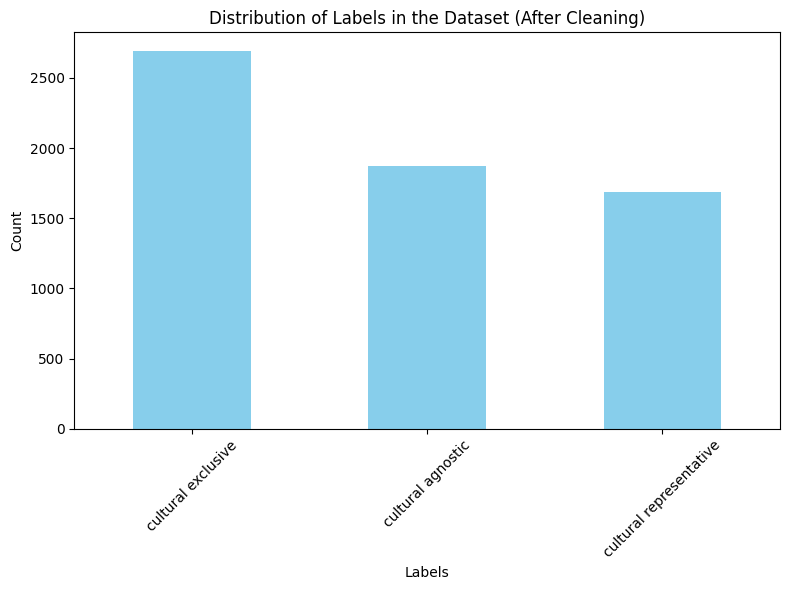


Label Counts:
label
cultural agnostic          117
cultural representative    107
cultural exclusive          76
Name: count, dtype: int64


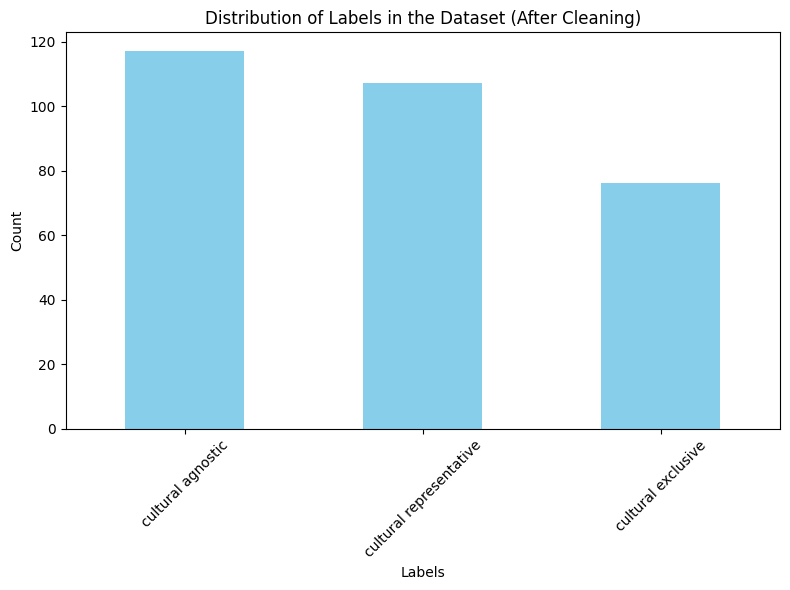

In [ ]:
visualize_class_imbalance(train_df)
visualize_class_imbalance(validation_df)

##### 1.0.5.4: DUPLICATES DISCOVERY

In [ ]:
check_duplicates(train_df)
check_duplicates(validation_df)

Cells that are not unique in column 'name':
['Alexandria' 'Breithorn' 'central government' 'Pirate Party' 'prefect'
 'Socialist Party']
Cells that are not unique in column 'name':
[]


##### 1.0.5.5: CLEANED DATASET INFORMATION


In [ ]:
# 1) Display basic DF information.
print("=== Training DataFrame Info ===")
train_df.info()

print("=== Validation DataFrame Info ===")
validation_df.info()

=== Training DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item         6251 non-null   object
 1   name         6251 non-null   object
 2   description  6251 non-null   object
 3   type         6251 non-null   object
 4   category     6251 non-null   object
 5   subcategory  6251 non-null   object
 6   label        6251 non-null   object
dtypes: object(7)
memory usage: 342.0+ KB
=== Validation DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item         300 non-null    object
 1   name         300 non-null    object
 2   description  300 non-null    object
 3   type         300 non-null    object
 4   category     300 non-null    object
 5   subcategory  300 non-

In [ ]:
# 2) Display DF Staistics.
print("\n=== Training DataFrame Statistics===")
print(train_df.describe())

print("\n=== Validation DataFrame Statistics===")
print(validation_df.describe())


=== Training DataFrame Statistics===
                                          item                name  \
count                                     6251                6251   
unique                                    6251                6245   
top     http://www.wikidata.org/entity/Q129298  central government   
freq                                         1                   2   

       description    type  category subcategory               label  
count         6251    6251      6251        6251                6251  
unique        5672       2        19         108                   3  
top     film genre  entity  politics  politician  cultural exclusive  
freq            32    3924       532          99                2691  

=== Validation DataFrame Statistics===
                                          item name  \
count                                      300  300   
unique                                     300  300   
top     http://www.wikidata.org/entity/Q615394  Yếm

In [ ]:
# 3) Check for duplicate rows
duplicate_mask = train_df.duplicated()
num_duplicates = duplicate_mask.sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows:")
    print(df[duplicate_mask])

# (DUPLICATES NOT PRESENT) !

Number of duplicate rows: 0


In [ ]:
# 4) Checking that we have really 19 categories, and also checking the according subcategories.
unique_categories = train_df["category"].unique()
unique_subcategories = train_df["subcategory"].unique()

print("Unique Categories:")
print(unique_categories)
print(len(unique_categories))
print("\nUnique Subcategories:")
print(unique_subcategories)
print(len(unique_subcategories))



Unique Categories:
['films' 'music' 'comics and anime' 'architecture' 'geography' 'history'
 'books' 'media' 'philosophy and religion' 'food' 'visual arts' 'politics'
 'sports' 'literature' 'transportation' 'biology' 'gestures and habits'
 'performing arts' 'fashion']
19

Unique Subcategories:
['film' 'musical group' 'comics' 'building' 'city' 'historical event'
 'book' 'film studio' 'philosophical movement' 'media company' 'magazine'
 'television' 'animation technique' 'film festival' 'drink'
 'architectural structure' 'music festival' 'art gallery' 'painting'
 'animation studio' 'politician' 'sports team' 'religious leader' 'poet'
 'film producer' 'museum' 'automobile manufacturer' 'construction'
 'writer' 'tree' 'river' 'government agency' 'ritual' 'animated film'
 'recurring sporting event' 'sports club' 'policy' 'greeting' 'law'
 'musical profession' 'animal' 'music genre' 'organism' 'political party'
 'mode of transport' 'neighborhood' 'actor' 'publisher' 'designer'
 'geographic 

In [ ]:
# 5) Category-SubCategories Dictionary construction.
cat_subcat_dict = train_df.groupby("category")["subcategory"].unique().to_dict()

print("Categories and their subcategories:")
for cat, subcats in cat_subcat_dict.items():
    print(f"Category: {cat} -> Subcategories: {list(subcats)} (Count: {len(subcats)})")

Categories and their subcategories:
Category: architecture -> Subcategories: ['building', 'architectural structure', 'construction', 'building material', 'architect', 'architectural style'] (Count: 6)
Category: biology -> Subcategories: ['tree', 'animal', 'organism', 'biologist', 'plant', 'fish'] (Count: 6)
Category: books -> Subcategories: ['book', 'non-fiction writer', 'bookstore'] (Count: 3)
Category: comics and anime -> Subcategories: ['comics', 'animation technique', 'animation studio', 'animated film', 'comics artist', 'manga'] (Count: 6)
Category: fashion -> Subcategories: ['designer', 'textile', 'traditional costume', 'clothing', 'model', 'fashion trend'] (Count: 6)
Category: films -> Subcategories: ['film', 'film festival', 'film producer', 'film director', 'film genre'] (Count: 5)
Category: food -> Subcategories: ['drink', 'dish', 'ingredient', 'food', 'cooking technique', 'cook'] (Count: 6)
Category: geography -> Subcategories: ['city', 'river', 'neighborhood', 'geographic l


Counts for each Category:
category
politics                   532
sports                     429
geography                  411
architecture               396
philosophy and religion    395
literature                 363
music                      348
food                       346
fashion                    319
visual arts                313
comics and anime           312
history                    304
biology                    286
media                      285
performing arts            275
films                      269
gestures and habits        259
transportation             217
books                      192
Name: count, dtype: int64

Counts for each Subcategory:
subcategory
politician           99
film                 95
law                  95
sport                95
ritual               94
                     ..
environment           5
cooking technique     4
fashion trend         4
writing style         4
body language         1
Name: count, Length: 108, dtype: int64


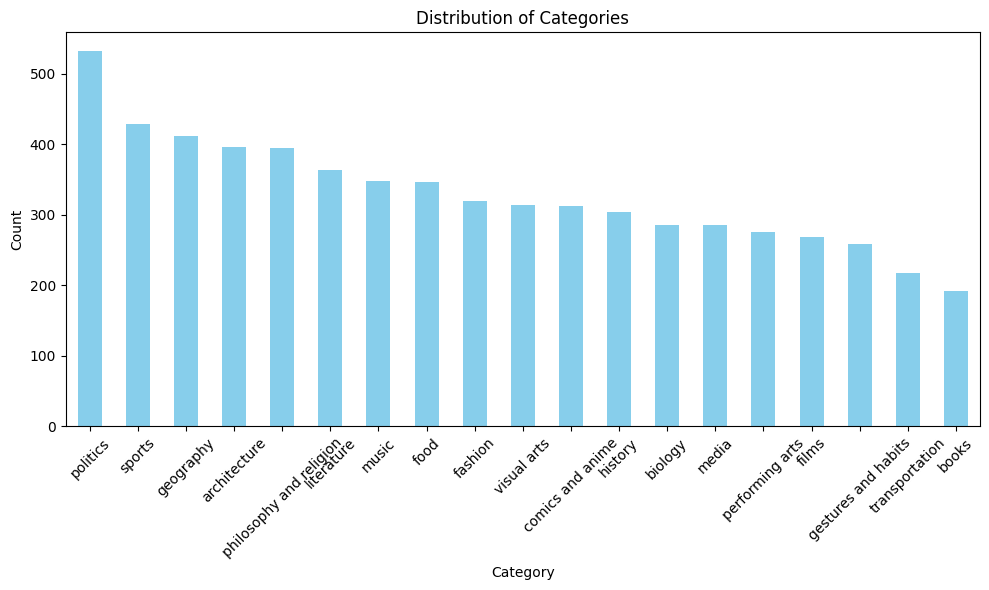

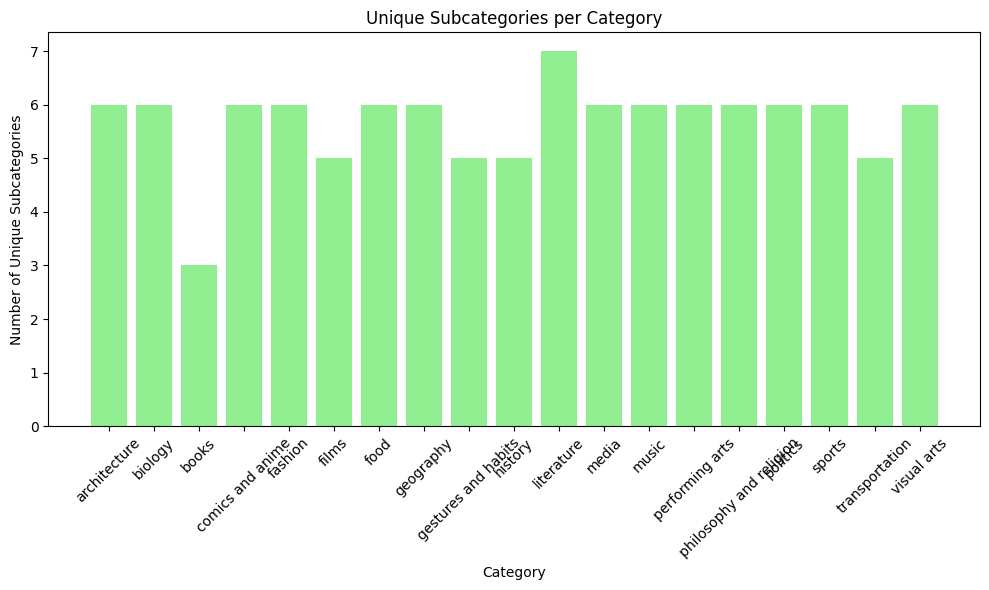

In [ ]:
# 6) Additionally, print counts of entries for each category.
category_counts = train_df["category"].value_counts()
print("\nCounts for each Category:")
print(category_counts)

# And for each subcategory
subcategory_counts = train_df["subcategory"].value_counts()
print("\nCounts for each Subcategory:")
print(subcategory_counts)

# Visualize the distribution of the main categories.
category_counts = train_df["category"].value_counts()
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the number of unique subcategories for each main category.
subcat_counts = {cat: len(subcats) for cat, subcats in cat_subcat_dict.items()}
plt.figure(figsize=(10,6))
plt.bar(subcat_counts.keys(), subcat_counts.values(), color='lightgreen')
plt.xlabel("Category")
plt.ylabel("Number of Unique Subcategories")
plt.title("Unique Subcategories per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1.0.5.6: SAVE MODIFIED DATAFRAME (CSV)

In [ ]:
df.to_csv("dataframe.csv", index=False)

### 1.1: DATASET WIKIDATA & WIKIPEDIA ENHANCEMENT

In this step we aim to gather all the necesary information, with the aim to add additional metadata to the dataset that will help the classification.

Notice that for now, we are checking whether there is a certain statement/information and we put it only if we have it. Otherwise, we don't include it at all.

#### 1.1.1: WIKIPEDIA INFORMATION EXTRACTION

In [ ]:
train_df

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q32786,916,2012 film by M. Mohanan,entity,films,film,cultural exclusive
1,http://www.wikidata.org/entity/Q371,!!!,American dance-punk band from California,entity,music,musical group,cultural representative
2,http://www.wikidata.org/entity/Q3729947,¡Soborno!,Mort & Phil comic,entity,comics and anime,comics,cultural representative
3,http://www.wikidata.org/entity/Q158611,+44,American band,entity,music,musical group,cultural representative
4,http://www.wikidata.org/entity/Q280375,1 Monk Street,"building in Monmouth, Wales",entity,architecture,building,cultural exclusive
...,...,...,...,...,...,...,...
6246,http://www.wikidata.org/entity/Q248878,Zust,automobile manufacturer,entity,transportation,automobile manufacturer,cultural exclusive
6247,http://www.wikidata.org/entity/Q1972616,zvonnitsa,structure for hanging bells,concept,architecture,architectural structure,cultural exclusive
6248,http://www.wikidata.org/entity/Q10779,Zwenkau,"city in the district of Leipzig, in the Free S...",entity,geography,city,cultural exclusive
6249,http://www.wikidata.org/entity/Q245296,zydeco,music genre evolved in southwest Louisiana whi...,entity,music,music genre,cultural representative


In [ ]:
def clean_text(text):
    '''
    Util function to Parse text (summary).
    '''

    text = text.replace('\n', ' ')
    return " ".join(text.split())

#Cleaning the strings
def clean_wikimarkup(text):
  '''
  Utility function to remove Wikipedia markup.
  '''

  if not isinstance(text, str):
      return str(text).strip()
  return re.sub(r"\[\[(?:[^|\]]*\|)?([^\]]+)\]\]", r"\1", text).strip()

def get_wikipedia_data(page_url, extracted_aliases=None):
    '''
    Function to extract data from an English Wikipedia page.
    It retrieves:
      - Page title
      - Summary
      - Categories
      - Infobox data
      - Internal links
      - External links
      - References and citations
      - Geographical coordinates
      - List of headings (titles and subtitles)
    '''

    # 1) Title extraction.
    parsed_url = urlparse(page_url)
    title = unquote(parsed_url.path.split("/")[-1])

    # 2) Wikipedia API object for English Wikipedia.
    page = wikipediaapi.Wikipedia(
        user_agent="WikiSheaf/1.0",
        language='en'
    ).page(title)

    # print(f"The page contains: {page}")

    if not page.exists():
        return None

    # 3) Extracted data Dictionary creation.
    data = {}

    # 4) Title, Summary and Categories Inclusion in the Dictionary.
    data['title'] = page.title
    data['summary'] = clean_text(page.summary)
    data['categories'] = [cat.replace("Category:", "").strip() for cat in page.categories.keys()]

    # 5) Infobox, internal & external links, references & citations, geo info
    #    and headings additional information.
    try:

        # Fetch parsed data from Wikipedia.
        wp_page = wptools.page(title, lang="en")
        wp_page.get_parse()
        extra = wp_page.data

        key_map = {
            "infobox": "infobox",
            "links": "internal_links",
            "externallinks": "external_links",
            "references": "references",
            "coordinates": "geographical_coordinates",
            "sections": "headings"
        }
        infobox_data = None

        # Only include keys that have a non-empty value.
        for extra_key, data_key in key_map.items():
            value = extra.get(extra_key)
            if value:
                if data_key == "infobox" and isinstance(value, dict):

                    # Exclude image and image size from the infobox.
                    exclude_keys = ["image", "image_size"]
                    filtered_infobox = {}

                    for k, v in value.items():
                        if k.lower() in exclude_keys:
                            continue

                        # Cleaning infobox.
                        if isinstance(v, list):
                            cleaned_list = [clean_wikimarkup(str(item)) for item in v if item]
                            filtered_infobox[k] = ", ".join(cleaned_list)
                        elif isinstance(v, str):
                            filtered_infobox[k] = clean_wikimarkup(v)
                        else:
                            filtered_infobox[k] = clean_wikimarkup(str(v))

                    # Add aliases if available into the infobox.
                    if extracted_aliases and extracted_aliases != ["No aliases found in English"]:
                        filtered_infobox["aliases"] = extracted_aliases

                    infobox_data = filtered_infobox
                else:
                    data[data_key] = value

        # Add infobox to the final output.
        if infobox_data:
            data["infobox"] = infobox_data
        else:
            # Add aliases if exist, otherwise if even the infobox is not found return the default answer.
            if extracted_aliases and extracted_aliases != ["No aliases found in English"]:
                data["infobox"] = {"aliases": extracted_aliases}
            else:
                data["infobox"] = {"note": "infobox not present in Wikipedia"}


    except Exception as e:
        print(f"Error fetching extra data from wptools for page '{title}':", e)

    return data

##### 1.1.1.1: WIKIPEDIA INFORMATION EXTRACTION - EXAMPLE USAGE

In [ ]:
print("STARTING TO EXTRACT FROM WIKIPEDIA...\n")
wikipedia_url = "https://en.wikipedia.org/wiki/Jingle_Belle"
wikipedia_data = get_wikipedia_data(wikipedia_url)

STARTING TO EXTRACT FROM WIKIPEDIA...



en.wikipedia.org (parse) Jingle_Belle
en.wikipedia.org (imageinfo) File:jingle belle cover.jpg
Jingle Belle (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:jingle be...
  infobox: <dict(15)> image, imagesize, caption, schedule, format,...
  pageid: 1660375
  parsetree: <str(22036)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Jingle Belle
  wikibase: Q431464
  wikidata_url: https://www.wikidata.org/wiki/Q431464
  wikitext: <str(18969)> {{Short description|Fictional character c...
}


In [ ]:
print("PRINTING DATA EXTRACTED FROM WIKIPEDIA...\n")
pprint.pprint(wikipedia_data)
infobox = wikipedia_data.get("infobox", {})


PRINTING DATA EXTRACTED FROM WIKIPEDIA...

{'categories': ['All articles with dead external links',
                'Articles with dead external links from November 2024',
                'Articles with permanently dead external links',
                'Articles with short description',
                'Christmas characters',
                'Comics by Paul Dini',
                'Dark Horse Comics titles',
                'Fictional elves',
                'Oni Press titles',
                'Short description matches Wikidata',
                'Title pop',
                'Top Cow characters',
                'Top Cow titles'],
 'infobox': {'ISBN': '978-1-63140-703-1',
             'TPB': 'Jingle Belle: The Whole Package!',
             'artists': 'Stephen DeStefano, Jose Garibaldi, Bill Morrison, '
                        'Stephanie Gladden',
             'caption': 'Jingle Belle (Design by Paul Dini).',
             'creators': 'Paul Dini',
             'date': '1999–present',
    

#### 1.1.2: WIKIDATA INFORMATION EXTRACTION

In [ ]:
def parse_wikidata_id(wikidata_url):
    '''
    Helper function to extract the Wikidata ID from a given Wikidata URL.
    '''
    return unquote(urlparse(wikidata_url).path.split("/")[-1])

def safe_request(url, params=None, headers=None, pause=0.1):
    '''
    Help function to avoid error 429 for too many request.
    '''
    # Headers to impose for the request.
    if headers is None:
        headers = {
            "User-Agent": (
                "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                "AppleWebKit/537.36 (KHTML, like Gecko) "
                "Chrome/122.0.0.0 Safari/537.36"
            )
        }
    while True:
        response = requests.get(url, params=params, headers=headers)

        # Handling the error.
        if response.status_code == 429:
            retry_after = int(response.headers.get("Retry-After", "5"))
            print(f"[429] Too Many Requests. Waiting {retry_after} seconds before retrying...")
            time.sleep(retry_after)
            continue

        try:
            # Adding a random pause (for safety purpose).
            response.raise_for_status()
            data = response.json()
            time.sleep(pause + random.uniform(0.1, 0.3))
            return data

        except Exception as e:
            print(f"Unexpected error: {e}")
            return None


def chunked(iterable, size):
    '''
    Helper function to split into chunks of a given size.
    '''
    for i in range(0, len(iterable), size):
        yield iterable[i:i + size]

def get_labels_batch(entity_ids, lang='en', chunk_size=50):
    '''
    Given a list of Wikidata IDs, returns a dictionary mapping each ID
    to its textual label using a single batched request.
    '''

    label_map = {}

    # Filter out invalid IDs.
    valid_ids = [eid for eid in entity_ids if isinstance(eid, str) and eid.startswith(("Q", "P"))]

    # Chunked id in order to respect limitations.
    for chunk in chunked(valid_ids, chunk_size):
        ids_str = "|".join(chunk)

        # Perform the request.
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "ids": ids_str,
            "format": "json",
            "props": "labels",
            "languages": lang
        }

        data = safe_request(url, params=params)
        if not data:
            print(f"[get_labels_batch] Failed for chunk: {chunk}")
            continue


       #  Extract the entities and their textual values.
        entities = data.get("entities", {})
        for eid, ent_data in entities.items():
            label = ent_data.get("labels", {}).get(lang, {}).get("value", None)
            if label:
                label_map[eid] = label

    return label_map


def get_wikidata_data(wikidata_url):
    '''
    Function to extract the complete information from a Wikidata record.
    It retrieves:
          - Label
          - Aliases (alternative names)
          - Statements (properties) (depending on the category and subcategory)
      It then extracts the English Wikipedia URL from the sitelinks and calls
      get_wikipedia_data() to fetch Wikipedia page info.
    '''
    # 1) Get the Wikidata ID.
    wikidata_id = parse_wikidata_id(wikidata_url)
    URL = f"https://www.wikidata.org/wiki/Special:EntityData/{wikidata_id}.json"

    # 2) Retrieve all the Wikidata.
    try:
        # 2.1) Fetch data from Wikidata API.
        data = safe_request(URL)
        if not data:
          print(f"Failed to fetch data from: {URL}")
          return None
        entity = data.get("entities", {}).get(wikidata_id, {})
        if not entity:
            print(f"No entity found for {wikidata_id}")
            return None
        wikidata_info = {}
        wikidata_info["id"] = wikidata_id

        # 2.2) Retrieve basic labels, descriptions.
        wikidata_info["label"] = entity.get("labels", {}).get("en", {}).get("value", None)

        # 2.3) Retrieve aliases (alternative names) in English.
        if "aliases" in entity and "en" in entity["aliases"]:
             aliases_list = [alias.get("value") for alias in entity["aliases"]["en"] if alias.get("value")]
        else:
            aliases_list = ["No aliases found in English"]
        wikidata_info["aliases"] = aliases_list

        # 2.4) Extract claims (properties (each one may include multiple values)).
        claims = entity.get("claims", {})
        all_ids = set()
        wikidata_info["statements"] = {}

        # Extract all the ids.
        for prop_id, claim_list in claims.items():
            all_ids.add(prop_id)
            for claim in claim_list:
                value = claim.get("mainsnak", {}).get("datavalue", {}).get("value", None)
                if isinstance(value, dict) and "id" in value:
                    all_ids.add(value["id"])

        # Obtain the textual values of the ids with the chunked request.
        label_map = get_labels_batch(list(all_ids))

        # Mapping the IDs extracted for the properties with their textual values (i.e.(P31)-->"instance of").
        for prop_id, claim_list in claims.items():
            prop_label = label_map.get(prop_id)
            if not prop_label:
                continue

            # Excluding all the identifiers from the wikidata page and all the image/video info.
            lower_label = prop_label.lower()
            if (
                " id" in lower_label or  # Exclude "GND ID", "ISBN ID", ecc.
                "image" in lower_label or
                "video" in lower_label or
                "icon" in lower_label or
                "audio" in lower_label or
                "logo" in lower_label or
                "file" in lower_label or
                "photo" in lower_label
            ):
                continue

            values = []

            # Mapping the IDs extracted for the value of the properties with their textual values (i.e. "Q5" →  "Human").
            for claim in claim_list:
                value = claim.get("mainsnak", {}).get("datavalue", {}).get("value", None)

                if isinstance(value, dict):
                    # If it's a wikibase-item ID
                    if "id" in value:
                        label = label_map.get(value["id"])
                        if label and label.strip().lower() != "null":
                            values.append(label)
                    else:
                        # It's a dict but not a Wikidata ID,then convert to JSON string
                        try:
                            values.append(json.dumps(value, ensure_ascii=False))
                        except Exception:
                            values.append(str(value))
                elif isinstance(value, str) and value.strip().lower() != "null":
                    values.append(value.strip())
                elif value is not None:
                    values.append(str(value).strip())

            # Control for invalid value.
            values = [v for v in values if v and str(v).strip().lower() not in ("none", "null", "")]
            if values:
                wikidata_info["statements"][prop_label] =  values

        # Final cleaning to avoid empty value.
        cleaned_statements = {k: v for k, v in wikidata_info["statements"].items() if v}
        wikidata_info["statements"] = cleaned_statements


        # 2.5) Extract English Wikipedia URL and call the get_wikipedia_data() function.
        if "sitelinks" in entity and "enwiki" in entity["sitelinks"]:
            wikipedia_url = entity["sitelinks"]["enwiki"].get("url", None)
        else:
            wikipedia_url = None
        wikidata_info["wikipedia_url"] = wikipedia_url

        if wikipedia_url:
            wiki_data = get_wikipedia_data(wikipedia_url, extracted_aliases=aliases_list)
        else:
            wiki_data = None

        wikidata_info["wikipedia_data"] = wiki_data

        return wikidata_info

    except Exception as e:
        print(f"Error fetching Wikidata data for {wikidata_url}: {e}")
        return None

##### 1.1.2.1: WIKIDATA INFORMATION EXTRACTION - EXAMPLE USAGE

In [ ]:
wikidata_url = "https://www.wikidata.org/wiki/Q177" # (Pizza)
#wikidata_url = "http://www.wikidata.org/entity/Q1639" # (Lamine Diack)
wikidata_record = get_wikidata_data(wikidata_url)

en.wikipedia.org (parse) Pizza
en.wikipedia.org (imageinfo) File:Pizza-3007395.jpg
Pizza (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Pizza-300...
  infobox: <dict(12)> name, image, image_size, caption, country, r...
  iwlinks: <list(6)> https://commons.wikimedia.org/wiki/Category:P...
  pageid: 24768
  parsetree: <str(77348)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Pizza
  wikibase: Q177
  wikidata_url: https://www.wikidata.org/wiki/Q177
  wikitext: <str(61349)> {{Short description|Italian dish with a f...
}


In [ ]:
pprint.pprint(wikidata_record)

{'aliases': ['pie', 'pizza pie'],
 'id': 'Q177',
 'label': 'pizza',
 'statements': {'Amazon.com browse node': ['18327546011', '6499426011'],
                'Commons category': ['Pizzas'],
                'Commons gallery': ['Pizza'],
                'Danbooru tag': ['pizza'],
                'Dewey Decimal Classification': ['641.8248'],
                'Google Doodle': ['celebrating-pizza'],
                'OmegaWiki Defined Meaning': ['415411'],
                'USDA NDB number': ['21479'],
                'Unicode character': ['🍕'],
                'booru tag': ['pizza'],
                'country of origin': ['Italy'],
                'course': ['main course'],
                'cuisine': ['Italian cuisine'],
                'exact match': ['http://wordnet-rdf.princeton.edu/wn30/07873807-n',
                                'http://wordnet-rdf.princeton.edu/wn31/107804430-n'],
                'has part(s)': ['tomato sauce',
                                'flour',
                   

In [ ]:
# Just checking whether the Summary has been parsed correctly.
print(wikidata_record["wikipedia_data"]["summary"] + "\n")
print(str(type(wikidata_record["wikipedia_data"]["summary"])) + "\n")
print("\n" in wikidata_record["wikipedia_data"]["summary"] )


Pizza is an Italian, specifically Neapolitan, dish typically consisting of a flat base of leavened wheat-based dough topped with tomato, cheese, and other ingredients, baked at a high temperature, traditionally in a wood-fired oven. The term pizza was first recorded in 997 AD, in a Latin manuscript from the southern Italian town of Gaeta, in Lazio, on the border with Campania. Raffaele Esposito is often credited for creating the modern pizza in Naples. In 2009, Neapolitan pizza was registered with the European Union as a traditional speciality guaranteed (TSG) dish. In 2017, the art of making Neapolitan pizza was included on UNESCO's list of intangible cultural heritage. Pizza and its variants are among the most popular foods in the world. Pizza is sold at a variety of restaurants, including pizzerias (pizza specialty restaurants), Mediterranean restaurants, via delivery, and as street food. In Italy, pizza served in a restaurant is presented unsliced, and is eaten with the use of a kn

#### 1.1.3: DATASET ENHANCED VERSION (WITH WIKIDATA & WIKIPEDIA)

We now build an **Dataset Enhanced Version**, by adding columns to the current dataset. These include:
- **statements**: The Wikidata's *dictionary* containing all statements.
- **wikipedia_categories**: The *list* of categories.
- **infobox**: The infobox *dictionary* from Wikipedia info.
- **summary**: The Wikipedia summary *text*.
- **top common statements**  : The top common statement of items after grouping.

All the info are extracted in parallel with the http requests except for the **top common statements** column that are,instead, extracted with a local post-analysis on the **statements** column.

In [ ]:
def enhance_row_with_WW(wikidata_url):
    '''
    Given a Wikidata URL, this function calls get_wikidata_data() to fetch enriched
    information (including linked Wikipedia data) and returns a dictionary with new keys:
      - statements: dictionary of key properties (default: empty dict)
      - wikipedia_categories: list of categories from Wikipedia data (default: empty list)
      - infobox: the Wikipedia infobox data (default: empty dict)
      - summary: the Wikipedia summary (default: empty string)
    '''
    # Define default values in case of error or missing info.
    default = {
        "statements": {},
        "wikipedia_categories": [],
        "infobox": {},
        "summary": ""
    }

    # If the URL is empty, return defaults immediately.
    if not wikidata_url:
        return default

    try:
        # Get enriched Wikidata info (which also includes linked Wikipedia data)
        wd_info = get_wikidata_data(wikidata_url)
        if not wd_info:
            return default

        # Extract Wikidata fields.
        statements = wd_info.get("statements", {})

        # Get the Wikipedia data from the Wikidata record (if available).
        wiki_data = wd_info.get("wikipedia_data", {})
        categories = wiki_data.get("categories", [])
        infobox = wiki_data.get("infobox", {})
        summary = wiki_data.get("summary", "")

        return {
            "statements": statements,
            "wikipedia_categories": categories,
            "infobox": infobox,
            "summary": summary
        }
    except Exception as e:
        print(f"Error in enhance_row_with_WW for URL {wikidata_url}: {e}")
        return default


In [ ]:
def process_row(example):
    # Extract the Wikidata URL from the "item" column.
    wikidata_url = example.get("item", "")
    # Get the enhanced info from the function.
    new_fields = enhance_row_with_WW(wikidata_url)
    # Update the row with the new keys.
    example.update(new_fields)
    return example

In [ ]:
# Process the train set
train_data = ds["train"].map(process_row, batched=False)

# Conversion in data frame
train_df = pd.DataFrame(train_data)

In [ ]:
# Process the validation set
val_data = ds["validation"].map(process_row, batched=False)

# Conversion in data frame
val_df = pd.DataFrame(val_data)

In [ ]:
def process_test_row(example):
    '''
    Function to process the test set: same as before
    but adapted for the panda dataframe.
    '''
    # Extract the Wikidata URL from the "item" column.
    wikidata_url = example["item"]
    # Get the enhanced info from the function.
    new_fields = enhance_row_with_WW(wikidata_url)
    # Update the row with the new keys.
    for key, value in new_fields.items():
        example[key] = value
    return example


In [ ]:
# Process the test set
test_df = test_df.apply(process_test_row, axis=1)

# Conversion in data frame
test_df = pd.DataFrame(test_df)

In [ ]:
test_df.head()

In [ ]:
def clean_dict(d):
    '''
    Help function to clean the dictionary.
    '''
    if not isinstance(d, dict):
        return {}
    return {k: v for k, v in d.items() if v}

def grouping(df,bool):
    '''
    Help function to grouping the statements
    in order to get the top common ones.
    '''
    grouped = df.groupby(["label", "category", "subcategory"]) if bool else df.groupby(["category", "subcategory"])
    group_statements_map = {}

    # Extract the statements for the group.
    for group_key, group_df in grouped:
        all_statements = []
        for statement_dict in group_df["statements"]:
            if not isinstance(statement_dict, dict):
                continue

            for prop, values in statement_dict.items():
                if not values:
                    continue
                if isinstance(values, list):
                    for val in values:
                        all_statements.append((prop, val))
                else:
                    all_statements.append((prop, values))

        # Count and return the top 10 common statements (minimum count>2).
        counter = Counter(all_statements)
        filtered = [(prop, val, count) for (prop, val), count in counter.items() if count >= 2]
        top_k = sorted(filtered, key=lambda x: x[2], reverse=True)[:10]

        top_statement_dict = {}
        for prop, val, count in top_k:
            if prop not in top_statement_dict:
                top_statement_dict[prop] = val

        group_statements_map[group_key] = top_statement_dict

    return group_statements_map

# Calling the function for train, val and test set.
group_statements_map_train = grouping(train_df,bool=True)
group_statements_map_val = grouping(val_df,bool=True)
group_statements_map_test= grouping(test_df,bool=False)

# Add the column to the enhanced dataset.
def get_top_statements_for_row(row, group_statements_map,bool):
    key = (row["label"], row["category"], row["subcategory"])  if bool else (row["category"], row["subcategory"])
    return group_statements_map.get(key, {})

train_df["top_common_statements"] = train_df.apply(
   lambda row: get_top_statements_for_row(row, group_statements_map_train,bool= True), axis=1)

val_df["top_common_statements"] = val_df.apply(
   lambda row: get_top_statements_for_row(row, group_statements_map_val,bool= True), axis=1)

test_df["top_common_statements"] = test_df.apply(
   lambda row: get_top_statements_for_row(row, group_statements_map_test,bool= False), axis=1)

# Save in Drive
train_path = "/content/drive/MyDrive/BorgiPreviti/train_enhanced.csv"
val_path = "/content/drive/MyDrive/BorgiPreviti/val_enhanced.csv"
test_path = "/content/drive/MyDrive/BorgiPreviti/test_enhanced.csv"
os.makedirs(os.path.dirname(train_path), exist_ok=True)
os.makedirs(os.path.dirname(val_path), exist_ok=True)
os.makedirs(os.path.dirname(test_path), exist_ok=True)

# Cleaning before saving into csv format.

train_df["statements"] = train_df["statements"].apply(clean_dict)
train_df["infobox"] = train_df["infobox"].apply(clean_dict)
train_df["top_common_statements"] = train_df["top_common_statements"].apply(clean_dict)

val_df["statements"] = val_df["statements"].apply(clean_dict)
val_df["infobox"] = val_df["infobox"].apply(clean_dict)
val_df["top_common_statements"] = val_df["top_common_statements"].apply(clean_dict)


test_df["statements"] = test_df["statements"].apply(clean_dict)
test_df["infobox"] = test_df["infobox"].apply(clean_dict)
test_df["top_common_statements"] = test_df["top_common_statements"].apply(clean_dict)

# Conversion in csv.
train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)
print(f"Saved in:\n{train_path}\n{val_path}\n{test_path}")

In [ ]:
train = pd.read_csv(train_path)
train.head()

In [ ]:
val = pd.read_csv(val_path)
val.head()

In [ ]:
test = pd.read_csv(test_path)
test.head()

### 1.2: PRE-TRAINED MODEL,DATA ACQUISITION AND PRE-ANALYSIS

#### 1.2.1: DOWNLOAD OF THE ENCODER

As you will in the section 2.5 regardind the *Final considerations of all the experiments*, the **sentence-transformers/all-mpnet-base-v2** fine tunings performed the best trend,showing a convergence to stability in all the trials.

Here showed a preview of what you will see in the ending part of section 2.5,to point out the optimal trend of the AllMpnetBaseV2 Models.

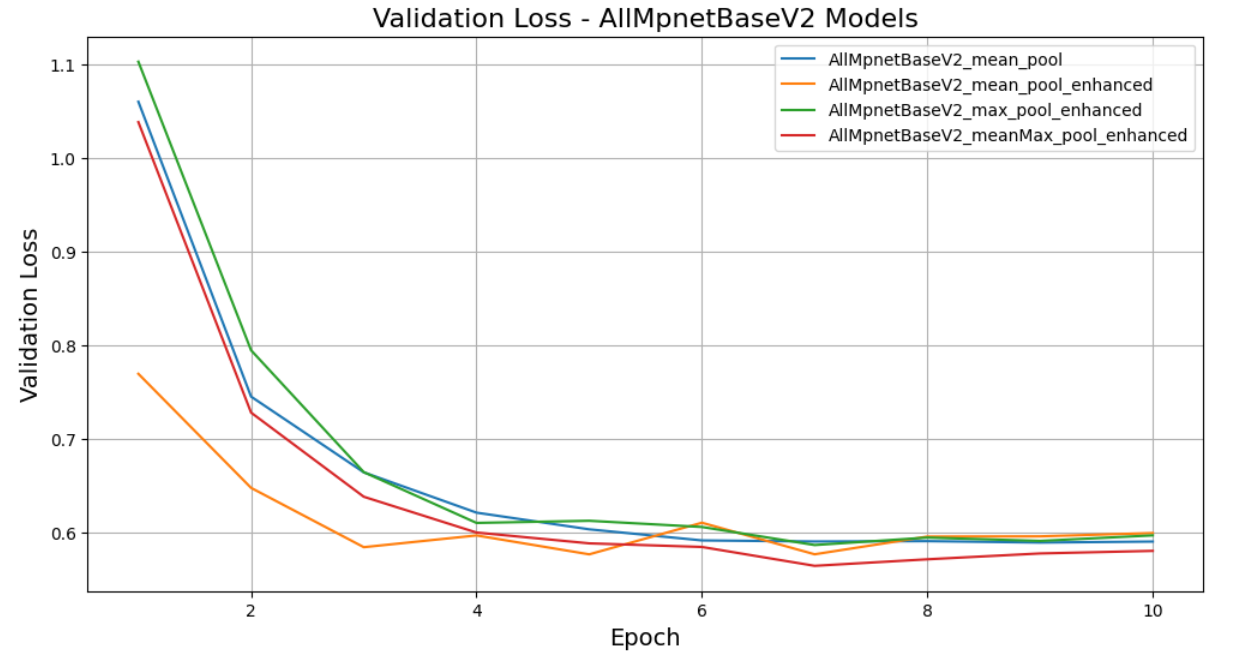

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "sentence-transformers/all-mpnet-base-v2"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Device to be used.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### 1.2.2: IMPORTING ENHANCED DATASETS

In [ ]:
# Path in the drive.
train_path = "/content/drive/MyDrive/BorgiPreviti/train_enhanced.csv"
val_path = "/content/drive/MyDrive/BorgiPreviti/val_enhanced.csv"
test_path = "/content/drive/MyDrive/BorgiPreviti/test_enhanced.csv"

# Train and val enhanced set.
train_dataset = pd.read_csv(train_path)
val_dataset = pd.read_csv(val_path)
test_dataset = pd.read_csv(test_path)

Mounted at /content/drive


In [ ]:
train_dataset.head()

,category,description,infobox,item,label,name,statements,subcategory,summary,type,wikipedia_categories,top_common_statements
0,films,2012 film by M. Mohanan,"{'name': '916', 'caption': 'Theatrical poster'...",http://www.wikidata.org/entity/Q32786,cultural exclusive,916,"{'instance of': ['film'], 'director': ['M. Moh...",film,916 is a 2012 Indian Malayalam-language drama ...,entity,"['2010s Malayalam-language films', '2012 drama...","{'instance of': 'film', 'color': 'color', 'ori..."
1,music,American dance-punk band from California,"{'name': '!!!', 'alias': 'Chk Chk Chk', 'lands...",http://www.wikidata.org/entity/Q371,cultural representative,!!!,"{'genre': ['dance-punk', 'indie rock', 'post-p...",musical group,"!!! ( ch(i)k-ch(i)k-ch(i)k), also known as Chk...",entity,"['!!!', '1996 establishments in California', '...","{'instance of': 'musical group', 'country of o..."
2,comics and anime,Mort & Phil comic,"{'noimage': 'yes', 'publisher': 'Editorial Bru...",http://www.wikidata.org/entity/Q3729947,cultural representative,¡Soborno!,"{'author': ['Francisco Ibáñez Talavera'], 'par...",comics,¡Soborno! (English: Bribery!) is a 1977 comic ...,entity,"['1977 graphic novels', '1977 in comics', 'Art...","{'instance of': 'comics', 'country of origin':..."
3,music,American band,"{'name': '+44', 'landscape': 'yes', 'caption':...",http://www.wikidata.org/entity/Q158611,cultural representative,+44,"{'instance of': ['musical group'], 'genre': ['...",musical group,+44 (read as Plus Forty-four) was an American ...,entity,"['All articles with unsourced statements', 'Al...","{'instance of': 'musical group', 'country of o..."
4,architecture,"building in Monmouth, Wales","{'name': ""Former Working Men's Free Institute,...",http://www.wikidata.org/entity/Q280375,cultural exclusive,1 Monk Street,"{'country': ['United Kingdom'], 'instance of':...",building,"1 Monk Street, Monmouth was built as a Working...",entity,"['Articles with short description', 'Buildings...","{'instance of': 'building', 'subclass of': 'bu..."


In [ ]:
val_dataset.head()

,item,name,description,type,category,subcategory,label,statements,wikipedia_categories,infobox,summary,top_common_statements
0,http://www.wikidata.org/entity/Q15786,1. FC Nürnberg,"German sports club based in Nuremberg, Bavaria",entity,sports,sports club,cultural representative,"{'Commons category': ['1. FC Nürnberg'], 'Face...","['1. FC Nürnberg', '1900 establishments in Ger...","{'aliases': ['1. FC Nurnberg', '1. FCN'], 'bod...",1. Fußball-Club Nürnberg Verein für Leibesübun...,{}
1,http://www.wikidata.org/entity/Q268530,77 Records,UK record label,entity,music,record label,cultural exclusive,"{'Commons category': ['77 Records'], 'country'...","['Articles with short description', 'Blues rec...","{'country': 'UK', 'founded': '{{start date|195...",77 Records was a British record company and la...,{'instance of': 'record label'}
2,http://www.wikidata.org/entity/Q216153,A Bug's Life,1998 animated film directed by John Lasseter a...,entity,comics and anime,animated film,cultural representative,"{'Australian Classification': ['G'], 'CNC film...","['1990s English-language films', ""1990s childr...","{'aliases': [""Bug's Life""], 'alt': 'The poster...",A Bug's Life (stylized in all lowercase) is a ...,{'CNC film rating (France)': 'no age restricti...
3,http://www.wikidata.org/entity/Q593,A Gang Story,2011 film by Olivier Marchal,entity,films,film,cultural exclusive,{'CNC film rating (France)': ['no minors under...,"['2010s French film stubs', '2010s French film...","{'aliases': ['Gang Story', 'Les Lyonnais'], 'b...",A Gang Story (French: Les Lyonnais) is a 2011 ...,{}
4,http://www.wikidata.org/entity/Q192185,Aaron Copland,"American composer, composition teacher, writer...",entity,performing arts,choreographer,cultural representative,{'BHCL UUID': ['be821d8a-9be3-4fb0-b12b-3a0b35...,"['1900 births', '1990 deaths', '20th-century A...","{'birth_date': '{{Birth date|1900|11|14}}', 'b...","Aaron Copland (, KOHP-lənd; November 14, 1900 ...","{'award received': 'Guggenheim Fellowship', 'i..."


In [ ]:
test_dataset.head()

,item,name,description,type,category,subcategory,statements,wikipedia_categories,infobox,summary,top_common_statements
0,http://www.wikidata.org/entity/Q2427430,Northeast Flag Replacement,Zhang Xueliang's announcement on 29 December 1...,concept,History,historical event,"{'point in time': ['{""time"": ""+1928-12-29T00:0...","['1928 in China', '20th century in Manchuria',...",{'aliases': ['Chinese reunification (1928)']},The Northeast Flag Replacement (traditional Ch...,{'instance of': 'historical event'}
1,http://www.wikidata.org/entity/Q125482,imam,Islamic leadership position,concept,philosophy and religion,religious leader,"{'Commons category': ['Imams'], 'instance of':...",['All articles with specifically marked weasel...,"{'name': 'Imam Ibrahim Hawlery', 'type': 'voca...","Imam (; Arabic: إمام, imām; pl.: أئمة, a'immah...","{'subclass of': 'religious leader', 'described..."
2,http://www.wikidata.org/entity/Q15789,FC Bayern Munich,"association football club in Munich, Germany",named entity,sports,sports club,"{'league or competition': ['Bundesliga'], 'ins...","['1900 establishments in Bavaria', 'All articl...","{'clubname': 'Bayern Munich', 'fullname': 'Fuß...","Fußball-Club Bayern München e. V. (FCB, German...","{'head coach': 'Jupp Heynckes', 'award receive..."
3,http://www.wikidata.org/entity/Q582496,Fome Zero,program intended to eradicate hunger and extre...,named entity,politics,government agency,"{'instance of': ['government agency'], 'countr...","['All articles with dead external links', 'Art...",{'note': 'infobox not present in Wikipedia'},Fome Zero (Portuguese pronunciation: [ˈfomi ˈz...,{'instance of': 'government agency'}
4,http://www.wikidata.org/entity/Q572811,Anthony Award,awards given at Bouchercon for mystery literature,named entity,Literature,literary award,"{""topic's main category"": ['Category:Anthony A...","['1986 establishments in the United States', '...","{'awarded_for': 'Best in mystery fiction', 'pr...",The Anthony Awards are literary awards for mys...,"{'subclass of': 'literary award', 'instance of..."


#### 1.2.3: PRE-ANALYSIS ON THE TEXT

The pre processing seen up to now for the extraction of the features is common to both metodologies (LLM-based and no LLM-based). For the Transformer part we encountered problem with the RAM of the colab environment when we tried to pass a longer sequence.

So the final decision was to add only the first senteces of the **summary**, in this way we avoid the RAM limitation, we stil are in the max_lenght=512 tokens and we definetely add the cleanest descriptive part. In this way we passed to the encoder the definition of the item without the noise and duplication typical of others features extracted (like infobox,statements,etc.).

In [ ]:
# Function to build the combined text
def enhancing_text(row):
    summary = str(row.get('summary', '') or '')
    sentences = sent_tokenize(summary)
    joined_sentences = " ".join(sentences[:3]) if sentences else''
    return (
        f"{row['name']}: {row['description']}. "
        f"Summary: {joined_sentences} "
    )

# Combination of data.
train_texts = train_dataset.apply(enhancing_text, axis=1)
val_texts = val_dataset.apply(enhancing_text, axis=1)

# Counting of token
train_lengths = [len(tokenizer.encode(text, truncation=False)) for text in train_texts]
val_lengths = [len(tokenizer.encode(text, truncation=False)) for text in val_texts]

# Treshold of 512 token
result_1 = sum(l > 512 for l in train_lengths)
result_2 = sum(l > 512 for l in val_lengths)

print(f" Number of train_sample with lenght > 512 token: {result_1}")
print(f"Number of val_sample with leght  > 512 token: {result_2}")

 Number of train_sample with lenght > 512 token: 0
Number of val_sample with leght  > 512 token: 0


### 1.3: MODEL

The final model used is the encoder **all_mpnet_base_v2** with a classification that is the result of a mixing strategy of two stable approaches: mean pooling classification and max pooling classification. The mean pooling performs a mean among
all the embedding tokens from the encoder,while
the max pooling picks up the max.

The idea is
that we want to mix up,in a smart way, the **smoothing** given by
the mean pool with the **aggressive** features given by the
max pool.  The natural consequence is to
sum in a weighted way,keeping the alpha term
learnable(avoiding the search in a discrete space of
options for this value), as:

    pooled = alpha * mean_pooled + (1 - alpha) * max_pooled

The final resultant vector is finally passed to two linear layers separated by a ReLU activation and a dropout of 0,4.




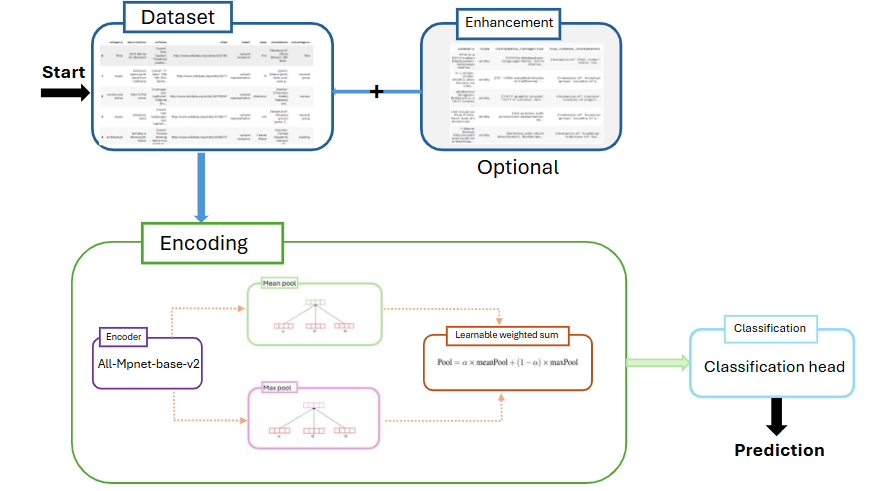

In [ ]:
class MeanMaxPoolingClassifier(nn.Module):
    def __init__(self, base_model, num_classes=3):
        super().__init__()
        self.encoder = base_model
        hidden_size = base_model.config.hidden_size
        self.dropout = nn.Dropout(0.4)

        # Classifier with a dropout of 0.4 and ReLU activation function.
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_size, num_classes)
        )
        # Alpha parameters learnable.
        self.alpha_param = nn.Parameter(torch.tensor(0.0))

    def mean_pooling(self, hidden, attention_mask):
        # Multiplication with mask (1 for real number,0 otherwise for padding).
        masked = hidden * attention_mask.unsqueeze(-1)
        # Summing of all the terms.
        sum = masked.sum(dim=1)
        # Clamping in order to avoid division by zero.
        count = attention_mask.unsqueeze(-1).sum(dim=1).clamp(min=1e-9)
        return sum / count

    def max_pooling(self, hidden, attention_mask):
        # Adding dimension to mask for further multiplication.
        mask = attention_mask.unsqueeze(-1)
        # Filling the padding with extreme low number(the max will never extract them),then computing the max.
        return hidden.masked_fill(mask == 0, -1e9).max(dim=1).values

    def forward(self, input_ids, attention_mask, labels=None):
        # Output from the encoder.
        encoding = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        hidden = encoding.last_hidden_state
        # Mean and max pooling.
        mean_pool = self.mean_pooling(hidden, attention_mask)
        max_pool = self.max_pooling(hidden, attention_mask)
        # Alpha learnable putted in interval [0,1] by the sigmoid.
        alpha = torch.sigmoid(self.alpha_param)
        # Weighted sum with alpha term.
        weighted_sum = alpha * mean_pool + (1 - alpha) * max_pool
        # Classification head.
        logits = self.classifier(self.dropout(weighted_sum))

        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}


### 1.4:TRAINING

For the training phase we decided to impose the **learning rate=1e-5**, **weight decay of 0.01** and to adopt a **freezing mechanism** in wich only the last 6 layers are learnable,in this way we tried to reach more stability in the validation loss.

As a remark,we adopted the strategy of the **enhanced text** composed by name,description and the first 3 sentences of the summary. The idea ,as already discussed, is to add the cleanest and most descriptive information (among those availables from the wikidata/wikipedia pages) without
exceeding the limitation of 512 tokens that you can
pass to the tokenizer(also for the limitation given by the RAM of the colab environment for longer sequences).

We finally reach **stability** around 0,58 in the validation loss (so no overfitting) and a peak of **79,67% of accuracy** with an **f1-score of 79,57%.**


In [ ]:
os.environ["WANDB_DISABLED"] = "true"

#Definition of the metrics
accuracy = load("accuracy")
precision = load("precision")
recall = load("recall")
f1 = load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return {
        "accuracy": accuracy.compute(predictions=predictions, references=labels)["accuracy"],
        "precision": precision.compute(predictions=predictions, references=labels, average="weighted")["precision"],
        "recall": recall.compute(predictions=predictions, references=labels, average="weighted")["recall"],
        "f1": f1.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    }

#Functions to convert label into id and viceversa
label_to_id = {
    "cultural exclusive": 0,
    "cultural representative": 1,
    "cultural agnostic": 2
}

reverse_convertion = {v: k for k, v in label_to_id.items()}

#Conversion of label to id in train data and validation data.
train_dataset["label"] = train_dataset["label"].apply(lambda x: label_to_id[x])
val_dataset["label"] = val_dataset["label"].apply(lambda x: label_to_id[x])

# Conversion into hugging face dataset.
train_dataset = Dataset.from_pandas(train_dataset)
val_dataset = Dataset.from_pandas(val_dataset)


def tokenize_function_enhanced(examples):
    '''
    Help function to tokenize in case of the
    addition of the first 3 sentences of the summary.
    '''
    texts = []

    for name, description, summary in zip(examples["name"], examples["description"], examples["summary"]):
        summary = str(summary or "")
        # In order to avoid simple split until the point (i.e case like M.Rossi is not splitted into 2 sentences).
        sentences = sent_tokenize(summary)
        # Joint of the first 3 sentences.
        joined_sentences = " ".join(sentences[:3]) if sentences else ''
        # New text with summary ennhancement.
        text = f"{name}: {description}. Summary: {joined_sentences}"
        texts.append(text)

    tokens = tokenizer(texts, padding=True, truncation=True)
    tokens["label"] = examples["label"]
    return tokens

def tokenize_function(examples):
    '''
    Help function to tokenize in case of
    no addition of the first sentences of the summary.
    '''
    text = [f"{name}: {description}." for name, description in zip(examples["name"], examples["description"])]
    tokens = tokenizer(text, padding=True, truncation=True)
    tokens["label"] = examples["label"]
    return tokens

def freezing(model,encoder_id, k):
    '''
    Help function to freeze the last k layers of the model.
    '''
    # Bert case.
    if encoder_id == "bert":
      total_layers = len(model.bert.encoder.layer)
      for i, layer in enumerate(model.bert.encoder.layer):
          requires_grad = i >= total_layers - k
          for param in layer.parameters():
              param.requires_grad = requires_grad
    # Distillbert case.
    if encoder_id == "distillbert":
      total_layers = len(model.encoder.transformer.layer)
      for i, layer in enumerate(model.encoder.transformer.layer):
          requires_grad = i >= total_layers - k
          for param in layer.parameters():
              param.requires_grad = requires_grad
    # All other case.
    if encoder_id == "general":
      total_layers = len(model.encoder.encoder.layer)
      for i, layer in enumerate(model.encoder.encoder.layer):
          requires_grad = i >= total_layers - k
          for param in layer.parameters():
              param.requires_grad = requires_grad
    for param in model.classifier.parameters():
        param.requires_grad = True

In [ ]:
def train(model, k, enhanced,learning_rate, per_device_train_batch_size, per_device_eval_batch_size,num_train_epochs,weight_decay,encoder_id):
    '''
    The main train function.
    '''

    # Call to the freezing function.
    freezing(model,encoder_id, k)

    # Boolean in order to select correct tokenizer.
    tokenize = tokenize_function_enhanced if enhanced else tokenize_function

    # Tokenization.
    tokenized_train = train_dataset.map(tokenize, batched=True)
    tokenized_eval = val_dataset.map(tokenize, batched=True)

    #Training args
    training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=per_device_eval_batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        warmup_steps=100,
        logging_dir='./logs',
        logging_steps=10,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        save_total_limit=1,
        report_to="none"
    )

    #Trainer
    trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=tokenized_train,
      eval_dataset=tokenized_eval,
      tokenizer=tokenizer,
      data_collator=data_collator,
      compute_metrics=compute_metrics,
    )

    #Call training and evaluation
    trainer.train()
    results = trainer.evaluate()

    #Printing result and save the model
    for key, value in results.items():
        print(f"{key}: {value:.4f}")

    # Saving the model.
    output_dir = "/content/drive/MyDrive/BorgiPrevit/local_transformer_model"
    os.makedirs(output_dir, exist_ok=True)
    trainer.save_model(output_dir)

In [ ]:
model = MeanMaxPoolingClassifier(base_model).to(device)
train(model,k=6,enhanced=True,learning_rate=1e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")

/tmp/ipykernel_31/828480508.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.046200,1.038577,0.533333,0.426284,0.533333,0.444046
2,0.748200,0.728199,0.726667,0.746790,0.726667,0.719422
3,0.602600,0.638319,0.760000,0.758268,0.760000,0.754905
4,0.535000,0.600083,0.766667,0.769033,0.766667,0.765249
5,0.481300,0.588524,0.773333,0.775777,0.773333,0.772504
6,0.471500,0.584680,0.770000,0.767580,0.770000,0.767657
7,0.510500,0.564507,0.796667,0.794975,0.796667,0.795733
8,0.431000,0.571492,0.790000,0.788888,0.790000,0.789209
9,0.432800,0.577742,0.783333,0.781436,0.783333,0.782131
10,0.439800,0.580488,0.780000,0.778929,0.780000,0.778870


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/

eval_loss: 0.5645
eval_accuracy: 0.7967
eval_precision: 0.7950
eval_recall: 0.7967
eval_f1: 0.7957
eval_runtime: 2.8605
eval_samples_per_second: 104.8760
eval_steps_per_second: 1.7480
epoch: 10.0000


### 1.5: FINAL TESTING

In [ ]:
# Device setup.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths.
allmpnetbasev2 = "sentence-transformers/all-mpnet-base-v2"
shared_folder_model = "/content/drive/MyDrive/BorgiPreviti/local_transformer_model"

#Load tokenizer and base model.
tokenizer = AutoTokenizer.from_pretrained(shared_folder_model, local_files_only=True)
base_model = AutoModel.from_pretrained(allmpnetbasev2)
weights_path = os.path.join(shared_folder_model, "model.safetensors")

# The model here is redifined,just in the case you just want to directly run this section.
class MeanMaxPoolingClassifier(nn.Module):
    def __init__(self, base_model, num_classes=3):
        super().__init__()
        self.encoder = base_model
        hidden_size = base_model.config.hidden_size
        self.dropout = nn.Dropout(0.4)

        # Classifier with a dropout of 0.4 and ReLU activation function.
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_size, num_classes)
        )
        # Alpha parameters learnable.
        self.alpha_param = nn.Parameter(torch.tensor(0.0))

    def mean_pooling(self, hidden, attention_mask):
        # Multiplication with mask (1 for real number,0 otherwise for padding).
        masked = hidden * attention_mask.unsqueeze(-1)
        # Summing of all the terms.
        sum = masked.sum(dim=1)
        # Clamping in order to avoid division by zero.
        count = attention_mask.unsqueeze(-1).sum(dim=1).clamp(min=1e-9)
        return sum / count

    def max_pooling(self, hidden, attention_mask):
        # Adding dimension to mask for further multiplication.
        mask = attention_mask.unsqueeze(-1)
        # Filling the padding with extreme low number(the max will never extract them),then computing the max.
        return hidden.masked_fill(mask == 0, -1e9).max(dim=1).values

    def forward(self, input_ids, attention_mask, labels=None):
        # Output from the encoder.
        encoding = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        hidden = encoding.last_hidden_state
        # Mean and max pooling.
        mean_pool = self.mean_pooling(hidden, attention_mask)
        max_pool = self.max_pooling(hidden, attention_mask)
        # Alpha learnable putted in interval [0,1] by the sigmoid.
        alpha = torch.sigmoid(self.alpha_param)
        # Weighted sum with alpha term.
        weighted_sum = alpha * mean_pool + (1 - alpha) * max_pool
        # Classification head.
        logits = self.classifier(self.dropout(weighted_sum))

        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}

# Instantiate model and loading weights.
model = MeanMaxPoolingClassifier(base_model)
state_dict = load_file(weights_path)
model.load_state_dict(state_dict)
model.to(device)
model.eval()


# Test set.
test_path = "/content/drive/MyDrive/BorgiPreviti/test_enhanced.csv"
test_df = pd.read_csv(test_path)

# Tokenization test function: same as before but without the label fiels
def new_tokenize_function(examples):
    texts = []
    for name, description, summary in zip(examples["name"], examples["description"], examples["summary"]):
        summary = str(summary or "")
        sentences = sent_tokenize(summary)
        joined_sentences = " ".join(sentences[:3]) if sentences else ''
        text = f"{name}: {description}. Summary: {joined_sentences}"
        texts.append(text)
    tokens = tokenizer(texts, padding="max_length", truncation=True, max_length=512)
    return tokens

# Create Test Dataset.
test_dataset = Dataset.from_pandas(test_df)
tokenized_test = test_dataset.map(new_tokenize_function, batched=True)
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask"])

# Create DataLoader.
test_loader = DataLoader(tokenized_test, batch_size=16)

# Inference.
logits_list = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs["logits"]

        logits_list.append(logits.cpu())

logits_list = torch.cat(logits_list, dim=0).numpy()

# Get the argmax to get the predicted labels.
predictions = np.argmax(logits_list, axis=-1)

# Map back id to labels.
reverse_convertion = {
    0: "cultural exclusive",
    1: "cultural representative",
    2: "cultural agnostic"
}

predictions = [reverse_convertion[label] for label in predictions]

# Add predicted labels to the original dataframe.
test_df["label"] = predictions

# Select only original column plus label.
final_df = test_df[["item", "name", "description", "type", "category", "subcategory", "label"]]

# Saving in the shared google drive folder.
output_path = "/content/drive/MyDrive/BorgiPreviti/BorgiPreviti_output_LLM_based_model.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
final_df.to_csv(output_path, index=False)

print(f"\n Prediction file saved at: {output_path}")

## 2: EXPERIMENTAL & JOURNEY TOWARDS THE FINAL SOLUTION

We decide to compare a number of encoders,here the complete list:

- BERT: https://arxiv.org/abs/1810.04805

- DistilBERT: https://arxiv.org/abs/1910.01108

- DeBERTa: https://arxiv.org/abs/2006.03654

- RoBERTa: https://arxiv.org/abs/1907.11692

- All-mpnet-base-v2: https://arxiv.org/abs/2004.09297

We firstly tried with BERT with many experiments in order to see how we could avoid the overfitting and reach more stability but with very low results. Then we move on to variation from the the lighter one (DistillBERT) to heaviers (DEeBERTa and RoBERTa) with different approaches registering more stability.

Finally we obtain the best result in term of the trade off stability/metrics with the **All-mpnet-base-v2** encoder,despite the fact that its use is most devoted to task of semantic similarity/clustering, we exploited its ability of a deeper understanding on the semantic of the sentence for our further classification purposes.

### 2.1: MODELS

Here highlated all the model used in the trials:

- **Simple Classifier**: just used in the BERT case, it was the most straightforward approach with just a classification head composed by a linear classifier.
- **GRU Classifier**:also here just used in the BERT case, adding the classification after the GRU result. We wanted to understand if the last token given by the GRU could be more effective than the classical [CLS] token.
- **Mean pooling classifier**: widely used in most of the cases becauase of the increasing of stability during training. The idea was to have a mean over all the token embeddings in order to achieve a classification with no overfitting.
- **Max pooling classifier**: used with the mpnet encoder,slightly worse result but stable. Used as a comparison with the mean pooling approach,here the idea was to pick up ,iteration by iteration, the most important features for the purpose of the classiffication task.

##### 2.1.1 : SIMPLE CLASSIFIER

In [ ]:
class Simple_Bert(nn.Module):
    def __init__(self, base_model, hidden_size=768, num_classes=3):
        super().__init__()
        self.encoder = base_model
        self.dropout = nn.Dropout(0.5)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids,attention_mask, labels=None):
        # Output from the encoder.
        encoding = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        # [CLS] token.
        x = encoding.last_hidden_state[:, 0]
        # Dropout and classification.
        x = self.dropout(x)
        # Linear classifier.
        logits = self.classifier(x)

        # Cross entropy loss.
        if labels is not None:
            loss = nn.CrossEntropyLoss()
            loss = loss(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}

#### 2.1.2 : GRU CLASSIFIER

In [ ]:
class GRU_BERT(nn.Module):
    def __init__(self, base_model, num_classes=3, hidden_dim=256):
        super().__init__()
        self.encoder = base_model
        encoder_hidden_size = base_model.config.hidden_size
        self.rnn =nn.GRU(encoder_hidden_size, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)

        # Classifier with a dropout of 0.4 and ReLU activation function.
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, input_ids, attention_mask, labels=None):
        # Output from the encoder.
        encoding = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        x = encoding.last_hidden_state
        # GRU result.
        output, _ = self.rnn(x)
        # Last valid token from the rnn.
        lengths = attention_mask.sum(dim=1) - 1
        last_valid = output[torch.arange(output.size(0)), lengths]
        # Classification head.
        logits = self.classifier(self.dropout(last_valid))

        # Cross entropy loss.
        if labels is not None:
            loss = nn.CrossEntropyLoss()
            loss = loss(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}


#### 2.1.3 : MEAN POOLING CLASSIFIER

In [ ]:
class MeanPoolingClassifier(nn.Module):
    def __init__(self, base_model, num_classes=3):
        super().__init__()
        self.encoder = base_model
        hidden_size = base_model.config.hidden_size
        self.dropout = nn.Dropout(0.4)

        # Classifier with a dropout of 0.4 and ReLU activation function.
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_size, num_classes)
        )
    def mean_pool(self, hidden, attention_mask):
        # Multiplication with mask (1 for real number,0 otherwise for padding).
        masked = hidden * attention_mask.unsqueeze(-1)
        # Summing of all the terms.
        sum = masked.sum(dim=1)
        # Clamping in order to avoid division by zero.
        count = attention_mask.unsqueeze(-1).sum(dim=1).clamp(min=1e-9)
        return sum / count

    def forward(self, input_ids, attention_mask, labels=None):
        # Output from the encoder.
        encoding = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        hidden = encoding.last_hidden_state
        # Mean pooling.
        pool = self.mean_pool(hidden, attention_mask)
        # Classification head.
        logits = self.classifier(self.dropout(pool))

        # Cross entropy loss.
        if labels is not None:
            loss = nn.CrossEntropyLoss()
            loss = loss(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}

#### 2.1.4: MAX POOLING CLASSIFIER

In [ ]:
class MaxPoolingClassifier(nn.Module):
    def __init__(self, base_model, num_classes=3):
        super().__init__()
        self.encoder = base_model
        hidden_size = base_model.config.hidden_size
        self.dropout = nn.Dropout(0.4)

        # Classifier with a dropout of 0.4 and ReLU activation function.
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_size, num_classes)
        )
    def max_pool(self, hidden, attention_mask):
        # Adding dimension to mask for further multiplication.
        mask = attention_mask.unsqueeze(-1)
        # Filling the padding with extreme low number(the max will never extract them),then computing the max.
        return hidden.masked_fill(mask == 0, -1e9).max(dim=1).values

    def forward(self, input_ids, attention_mask, labels=None):
        # Output from the encoder.
        encoding = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        hidden = encoding.last_hidden_state
        # Max pooling.
        pool = self.max_pool(hidden, attention_mask)
        # Classification head.
        logits = self.classifier(self.dropout(pool))

        # Cross entropy loss.
        if labels is not None:
            loss = nn.CrossEntropyLoss()
            loss = loss(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}



### 2.2: NON EHANCED TRIALS

In this section the only information passed trough the encoder are in the format "**name:description**".



#### 2.2.1: BERT: AUTOMODEL FOR SEQUENCE CLASSIFICATION

In this first experiment,we tried to avoid instability in the validation loss but with very bad results. Despite this we stil achieved a less aggressive increasing of the loss due to the freezing of the first six layers during the fine tuning.

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "bert-base-uncased"
base_model = AutoModelForSequenceClassification.from_pretrained(model_name,ignore_mismatched_sizes=True,output_attentions=False, output_hidden_states=False,num_labels=3)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train(base_model,k=6,enhanced=False,learning_rate=2e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="bert")

/tmp/ipykernel_31/3341362100.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.715500,0.667245,0.696667,0.696290,0.696667,0.681860
2,0.526600,0.583701,0.740000,0.738958,0.740000,0.736896
3,0.410600,0.601140,0.756667,0.752184,0.756667,0.750218
4,0.346200,0.607405,0.756667,0.753954,0.756667,0.753790
5,0.266500,0.641784,0.753333,0.748738,0.753333,0.750702
6,0.258100,0.693397,0.770000,0.766218,0.770000,0.766941
7,0.255900,0.710614,0.763333,0.759363,0.763333,0.759753
8,0.185700,0.723629,0.766667,0.766220,0.766667,0.765302
9,0.167400,0.747182,0.770000,0.765754,0.770000,0.767012
10,0.167800,0.747532,0.776667,0.774183,0.776667,0.774957


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

eval_loss: 0.7475
eval_accuracy: 0.7767
eval_precision: 0.7742
eval_recall: 0.7767
eval_f1: 0.7750
eval_runtime: 0.6745
eval_samples_per_second: 444.7510
eval_steps_per_second: 7.4130
epoch: 10.0000


#### 2.2.2: BERT PLUS SIMPLE CLASSIFIER


A slightly more complex trial,with the same idea of freezing(that we always applied from now on), same learning rate and same weight decay. But,as you can see, we finally reached an even more aggressive increasing of the validation loss.

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "bert-base-uncased"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model = Simple_Bert(base_model).to(device)
train(model,k=6,enhanced=False,learning_rate=2e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")


/tmp/ipykernel_31/4027508772.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.637800,0.620300,0.720000,0.717783,0.720000,0.711883
2,0.529700,0.565999,0.750000,0.748420,0.750000,0.744301
3,0.403900,0.613620,0.756667,0.755314,0.756667,0.749000
4,0.357900,0.594911,0.760000,0.757366,0.760000,0.758105
5,0.294700,0.677464,0.763333,0.757222,0.763333,0.758854
6,0.261600,0.698763,0.763333,0.760085,0.763333,0.760595
7,0.257300,0.747810,0.780000,0.774160,0.780000,0.775914
8,0.198600,0.794165,0.763333,0.761636,0.763333,0.760686
9,0.173500,0.832853,0.770000,0.763844,0.770000,0.765805
10,0.189600,0.831236,0.770000,0.765000,0.770000,0.766540


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

eval_loss: 0.7478
eval_accuracy: 0.7800
eval_precision: 0.7742
eval_recall: 0.7800
eval_f1: 0.7759
eval_runtime: 0.6426
eval_samples_per_second: 466.8480
eval_steps_per_second: 7.7810
epoch: 10.0000


#### 2.2.3: BERT GRU


Here,as a remark, the idea was to understand if the last token of the GRU could be more effective than the [CLS] token for the classification. We still achieved an increasing in the validation loss that represent clear overfitting.

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "bert-base-uncased"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model=GRU_BERT(base_model).to(device)
train(model,k=6,enhanced=False,learning_rate=2e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")

/tmp/ipykernel_31/1023620914.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.799100,0.754758,0.630000,0.666276,0.630000,0.576364
2,0.496400,0.593296,0.766667,0.780143,0.766667,0.769243
3,0.434700,0.560106,0.766667,0.765439,0.766667,0.765881
4,0.336400,0.612477,0.770000,0.775983,0.770000,0.771822
5,0.240600,0.674888,0.750000,0.749769,0.750000,0.749836
6,0.241000,0.695067,0.763333,0.761268,0.763333,0.761971
7,0.300500,0.718361,0.770000,0.769743,0.770000,0.768657
8,0.142100,0.756904,0.760000,0.760696,0.760000,0.760036
9,0.135600,0.786336,0.756667,0.756680,0.756667,0.756661
10,0.158900,0.785044,0.760000,0.758099,0.760000,0.758925


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

eval_loss: 0.6125
eval_accuracy: 0.7700
eval_precision: 0.7760
eval_recall: 0.7700
eval_f1: 0.7718
eval_runtime: 2.7747
eval_samples_per_second: 108.1200
eval_steps_per_second: 1.8020
epoch: 10.0000


#### 2.2.4: BERT MEAN POOLING


This is the last experiment with BERT, in which we firstly tried the mean pool approach (with the same strategy for the training). The result, as you can see, is stil unstable in term of validation loss.

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "bert-base-uncased"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model = MeanPoolingClassifier(base_model).to(device)
train(model,k=6,enhanced=False,learning_rate=2e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")


/tmp/ipykernel_31/2252531175.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.732900,0.691092,0.670000,0.657528,0.670000,0.648247
2,0.510800,0.575952,0.750000,0.750828,0.750000,0.749805
3,0.421200,0.605478,0.766667,0.762145,0.766667,0.761774
4,0.359400,0.611227,0.753333,0.752864,0.753333,0.752876
5,0.314000,0.644089,0.750000,0.745315,0.750000,0.746159
6,0.276200,0.671985,0.756667,0.751821,0.756667,0.753572
7,0.289800,0.715128,0.753333,0.746309,0.753333,0.748016
8,0.236900,0.732347,0.756667,0.751127,0.756667,0.753114
9,0.194600,0.755605,0.756667,0.750391,0.756667,0.752355
10,0.208200,0.750549,0.760000,0.753951,0.760000,0.755962


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

eval_loss: 0.6055
eval_accuracy: 0.7667
eval_precision: 0.7621
eval_recall: 0.7667
eval_f1: 0.7618
eval_runtime: 0.6847
eval_samples_per_second: 438.1790
eval_steps_per_second: 7.3030
epoch: 10.0000


#### 2.2.5: ROBERTA MEAN POOLING


Here the first change of encoder. We still used mean pool and,for the first time, the increasing of the validation loss doesn't overcome the treshold of 0,70 with a peak of 76,67% of accuracy.

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "roberta-base"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model = MeanPoolingClassifier(base_model).to(device)
train(model,k=6,enhanced=False,learning_rate=2e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")


/tmp/ipykernel_31/1366945561.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.686800,0.679120,0.676667,0.664414,0.676667,0.662273
2,0.524500,0.611296,0.720000,0.719628,0.720000,0.715880
3,0.464900,0.566696,0.753333,0.747055,0.753333,0.748384
4,0.420300,0.581568,0.756667,0.753855,0.756667,0.753957
5,0.381600,0.619630,0.766667,0.759465,0.766667,0.761277
6,0.362900,0.625743,0.766667,0.760470,0.766667,0.762000
7,0.375200,0.638821,0.756667,0.751013,0.756667,0.751995
8,0.303200,0.679439,0.760000,0.754213,0.760000,0.755417
9,0.320000,0.690106,0.763333,0.755710,0.763333,0.757989
10,0.294200,0.686907,0.753333,0.747845,0.753333,0.748563


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

eval_loss: 0.6257
eval_accuracy: 0.7667
eval_precision: 0.7605
eval_recall: 0.7667
eval_f1: 0.7620
eval_runtime: 0.6319
eval_samples_per_second: 474.7760
eval_steps_per_second: 7.9130
epoch: 10.0000


#### 2.2.6: DISTILLBERT MEAN POOLING


Here the behavior is very similar to the previos one but with a peak of 78,3% of accuracy and with less training time, due to the presence of only 6 layers (3 freezed).

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "distilbert-base-uncased"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model = MeanPoolingClassifier(base_model).to(device)
train(model,k=3,enhanced=False,learning_rate=2e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id='distillbert')

/tmp/ipykernel_31/2673892947.py:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.839400,0.748932,0.623333,0.668840,0.623333,0.541391
2,0.514000,0.591992,0.736667,0.733200,0.736667,0.731356
3,0.441800,0.593291,0.760000,0.753152,0.760000,0.752969
4,0.408100,0.595766,0.766667,0.762489,0.766667,0.763095
5,0.339500,0.628574,0.776667,0.775532,0.776667,0.772946
6,0.325800,0.641219,0.766667,0.760713,0.766667,0.762476
7,0.361800,0.653236,0.783333,0.782591,0.783333,0.779772
8,0.284700,0.682541,0.773333,0.770688,0.773333,0.769426
9,0.277800,0.692969,0.776667,0.773709,0.776667,0.772851
10,0.274200,0.690690,0.773333,0.772485,0.773333,0.769763


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

eval_loss: 0.6532
eval_accuracy: 0.7833
eval_precision: 0.7826
eval_recall: 0.7833
eval_f1: 0.7798
eval_runtime: 0.3201
eval_samples_per_second: 937.2280
eval_steps_per_second: 15.6200
epoch: 10.0000


#### 2.2.7: DEBERTA MEAN POOLING


Still very similar results in wich the validation loss stabilized around 0,65 and with a peak of 77,67% of accuracy.

The learning rate is (from now on) setted to 1e-5 to reduce the risk of overfitting.

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "microsoft/deberta-v3-base"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


# Call the model and training.
model = MeanPoolingClassifier(base_model).to(device)
train(model,k=6,enhanced=False,learning_rate=1e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")


/tmp/ipykernel_31/3497338913.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.878900,0.842972,0.570000,0.402784,0.570000,0.459826
2,0.564300,0.603038,0.743333,0.745961,0.743333,0.742899
3,0.493700,0.591154,0.776667,0.773752,0.776667,0.774399
4,0.432300,0.617182,0.766667,0.768905,0.766667,0.767663
5,0.429000,0.643272,0.770000,0.776106,0.770000,0.770146
6,0.403600,0.632244,0.776667,0.776082,0.776667,0.776192
7,0.463900,0.635493,0.776667,0.774695,0.776667,0.775490
8,0.353500,0.644626,0.773333,0.772686,0.773333,0.772863
9,0.390400,0.661513,0.766667,0.765602,0.766667,0.766087
10,0.343000,0.662326,0.763333,0.763402,0.763333,0.762885


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/

eval_loss: 0.6322
eval_accuracy: 0.7767
eval_precision: 0.7761
eval_recall: 0.7767
eval_f1: 0.7762
eval_runtime: 0.9320
eval_samples_per_second: 321.9030
eval_steps_per_second: 5.3650
epoch: 10.0000


#### 2.2.8: ALL_MPNET_BASE_V2 MEAN POOLING


First trial with our last encoder, with a stabilization of the validation loss around 0,59 (the lowest until now) and a peak of 78,67% of accuracy.

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "sentence-transformers/all-mpnet-base-v2"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model = MeanPoolingClassifier(base_model).to(device)
train(model,k=6,enhanced=False,learning_rate=1e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")


/tmp/ipykernel_31/243402846.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.051800,1.060357,0.470000,0.408194,0.470000,0.391035
2,0.746400,0.745303,0.706667,0.728839,0.706667,0.685289
3,0.632000,0.664397,0.726667,0.717343,0.726667,0.715252
4,0.557900,0.621332,0.763333,0.763328,0.763333,0.757260
5,0.527900,0.603516,0.766667,0.770415,0.766667,0.761870
6,0.500200,0.591657,0.770000,0.764762,0.770000,0.766417
7,0.533500,0.590531,0.786667,0.787519,0.786667,0.784245
8,0.459600,0.590905,0.776667,0.772465,0.776667,0.772565
9,0.487800,0.589375,0.776667,0.772465,0.776667,0.772565
10,0.483500,0.590445,0.780000,0.778573,0.780000,0.776127


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/

eval_loss: 0.5905
eval_accuracy: 0.7867
eval_precision: 0.7875
eval_recall: 0.7867
eval_f1: 0.7842
eval_runtime: 0.6739
eval_samples_per_second: 445.1830
eval_steps_per_second: 7.4200
epoch: 10.0000


### 2.3: ENHANCED TRIAL

In this section the information passed trough the encoder are in the format "**name:description, summary:**".

#### 2.3.1: ALL_MPNET_BASE_V2 MEAN POOLING ENHANCED

Here we picked up the best model in terms of stability/metric results and we applied the enhancement of the text with the first 3 sentences of the summary.

The results are quiet similar to the previous one but with a slightly less accuracy (78,33%).

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "sentence-transformers/all-mpnet-base-v2"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model = MeanPoolingClassifier(base_model).to(device)
train(model,k=6,enhanced=True,learning_rate=1e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")


<ipython-input-15-2ad6342d3fa3>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.744500,0.769660,0.713333,0.735942,0.713333,0.709020
2,0.584000,0.647794,0.746667,0.756644,0.746667,0.741578
3,0.544700,0.584431,0.756667,0.755981,0.756667,0.755133
4,0.448600,0.596992,0.763333,0.769951,0.763333,0.760105
5,0.401200,0.576790,0.783333,0.781425,0.783333,0.782292
6,0.393200,0.610568,0.770000,0.773865,0.770000,0.767426
7,0.386900,0.576835,0.783333,0.779610,0.783333,0.780962
8,0.400100,0.595782,0.776667,0.776032,0.776667,0.774750
9,0.377800,0.596017,0.780000,0.776337,0.780000,0.777827
10,0.383300,0.599516,0.766667,0.765313,0.766667,0.764664


eval_loss: 0.5768
eval_accuracy: 0.7833
eval_precision: 0.7814
eval_recall: 0.7833
eval_f1: 0.7823
eval_runtime: 4.6685
eval_samples_per_second: 64.2600
eval_steps_per_second: 2.1420
epoch: 10.0000


#### 2.3.2: ALL_MPNET_BASE_V2 MAX POOLING ENHANCED

Finally the last trial in wich we tried the max pool approach in the enhanced case, achieving stability but with slightly less accuracy (77,33%).

In [ ]:
# AutoModel,AutoTokenizer and data_collator for the encoder
model_name = "sentence-transformers/all-mpnet-base-v2"
base_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Call the model and training.
model = MaxPoolingClassifier(base_model).to(device)
train(model,k=6,enhanced=True,learning_rate=1e-5,per_device_train_batch_size=32,per_device_eval_batch_size=32,num_train_epochs=10,weight_decay=0.01,encoder_id="general")

/tmp/ipykernel_31/2414440525.py:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.059300,1.103125,0.253333,0.064178,0.253333,0.102411
2,0.811400,0.794811,0.610000,0.437275,0.610000,0.496622
3,0.635600,0.664596,0.753333,0.758861,0.753333,0.747132
4,0.571200,0.610359,0.773333,0.773302,0.773333,0.770530
5,0.506900,0.612646,0.753333,0.757415,0.753333,0.749117
6,0.481700,0.606017,0.773333,0.771530,0.773333,0.769310
7,0.525100,0.586728,0.770000,0.769802,0.770000,0.768502
8,0.430500,0.594686,0.763333,0.764776,0.763333,0.761801
9,0.437200,0.591128,0.773333,0.770777,0.773333,0.770465
10,0.446400,0.597039,0.773333,0.774145,0.773333,0.771250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead 

eval_loss: 0.5970
eval_accuracy: 0.7733
eval_precision: 0.7741
eval_recall: 0.7733
eval_f1: 0.7712
eval_runtime: 2.7912
eval_samples_per_second: 107.4800
eval_steps_per_second: 1.7910
epoch: 10.0000


### 2.4 : FINAL CONSIDERATION OF ALL THE EXPERIMENTS

Here as a conclusion of this survey we will plot all the validation loss of our experiments (including the final one that we already described in section 1.3 and 1.4).

#### 2.4.1 : BERT EXPERIMENTS

All the experiments show a clear overfitting due to the increasing of
the validation loss.

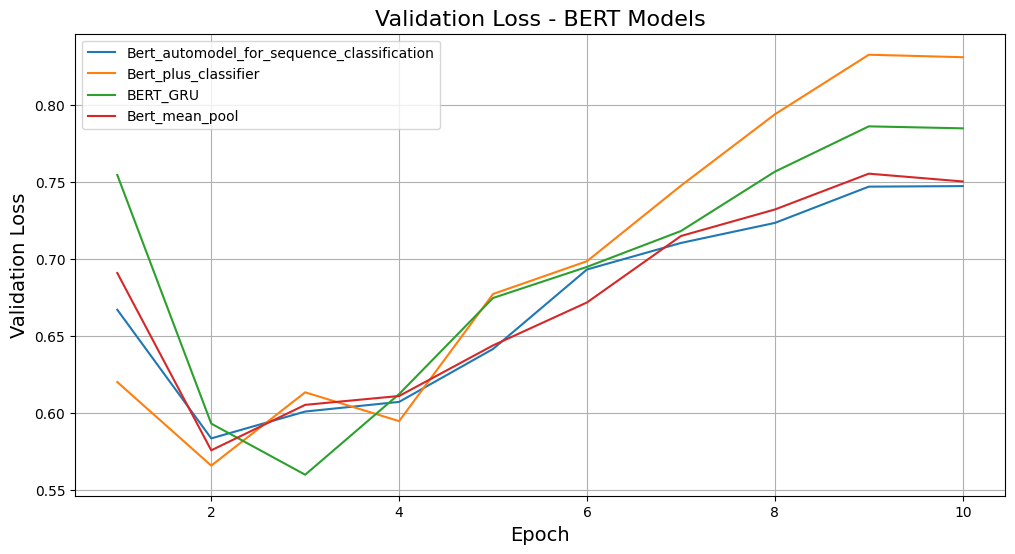

In [ ]:
epochs = list(range(1, 11))  # 10 epochs
validation_losses = {
    "Bert_automodel_for_sequence_classification": [0.667245, 0.583701, 0.601140, 0.607405, 0.641784, 0.693397, 0.710614, 0.723629, 0.747182, 0.747532],
    "Bert_plus_classifier": [0.620300, 0.565999, 0.613620, 0.594911, 0.677464, 0.698763, 0.747810, 0.794165, 0.832853, 0.831236],
    "BERT_GRU": [0.754758, 0.593296, 0.560106, 0.612477, 0.674888, 0.695067, 0.718361, 0.756904, 0.786336, 0.785044],
    "Bert_mean_pool": [0.691092, 0.575952, 0.605478, 0.611227, 0.644089, 0.671985, 0.715128, 0.732347, 0.755605, 0.750549],
    "Roberta_mean_pool": [0.679120, 0.611296, 0.566696, 0.581568, 0.619630, 0.625743, 0.638821, 0.679439, 0.690106, 0.686907],
    "Distillbert_mean_pool": [0.748932, 0.591992, 0.593291, 0.595766, 0.628574, 0.641219, 0.653236, 0.682541, 0.692969, 0.690690],
    "Debert_mean_pool": [0.842972, 0.603038, 0.591154, 0.617182, 0.643272, 0.632244, 0.635493, 0.644626, 0.661513, 0.662326],
    "AllMpnetBaseV2_mean_pool": [1.060357, 0.745303, 0.664397, 0.621332, 0.603516, 0.591657, 0.590531, 0.590905, 0.589375, 0.590445],
    "AllMpnetBaseV2_mean_pool_enhanced": [0.769660, 0.647794, 0.584431, 0.596992, 0.576790, 0.610568, 0.576835, 0.595782, 0.596017, 0.599516],
    "AllMpnetBaseV2_max_pool_enhanced": [1.103125, 0.794811, 0.664596, 0.610359, 0.612646, 0.606017, 0.586728, 0.594686, 0.591128, 0.597039],
    "AllMpnetBaseV2_meanMax_pool_enhanced": [1.038577, 0.728199, 0.638319, 0.600083, 00.588524, 0.584680, 0.564507, 0.571492, 0.577742, 0.580488]
}

bert_models = [
    "Bert_automodel_for_sequence_classification",
    "Bert_plus_classifier",
    "BERT_GRU",
    "Bert_mean_pool"
]
plt.figure(figsize=(12, 6))
for model in bert_models:
    plt.plot(epochs, validation_losses[model], label=model)
plt.title("Validation Loss - BERT Models", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Validation Loss", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#### 2.4.2 : DeBERT/DistillBERT/RoBERTa EXPERIMENTS

The mean pool approach reaches a
smoother behavior but with still an increasing trend in the last epochs .

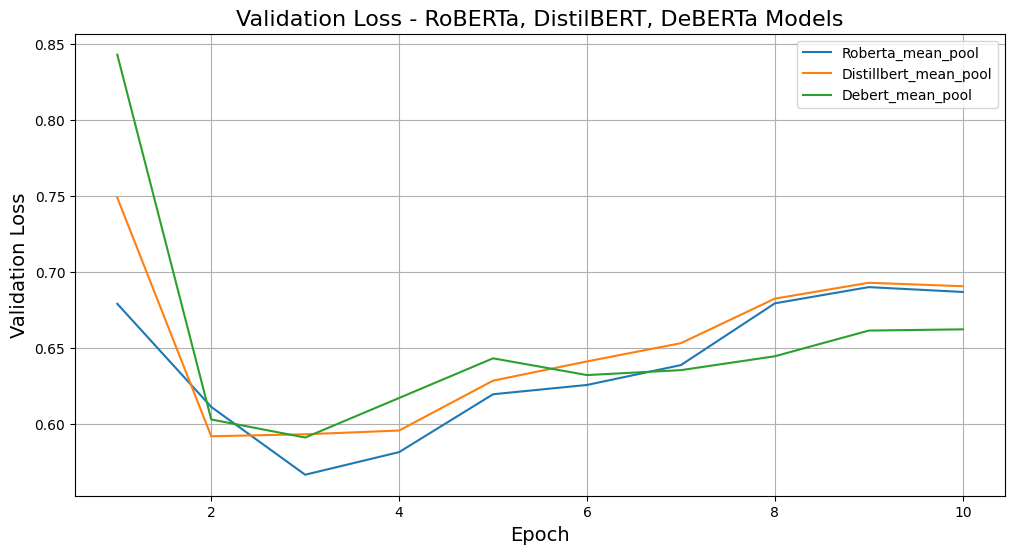

In [ ]:
other_models = [
    "Roberta_mean_pool",
    "Distillbert_mean_pool",
    "Debert_mean_pool"
]
plt.figure(figsize=(12, 6))
for model in other_models:
    plt.plot(epochs, validation_losses[model], label=model)
plt.title("Validation Loss - RoBERTa, DistilBERT, DeBERTa Models", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Validation Loss", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#### 2.4.3 : ALL_MPNET_BASE_V2 EXPERIMENTS

The experiments converge to stability around 0.60
with the minimum reached by our MeanMax pool approach .

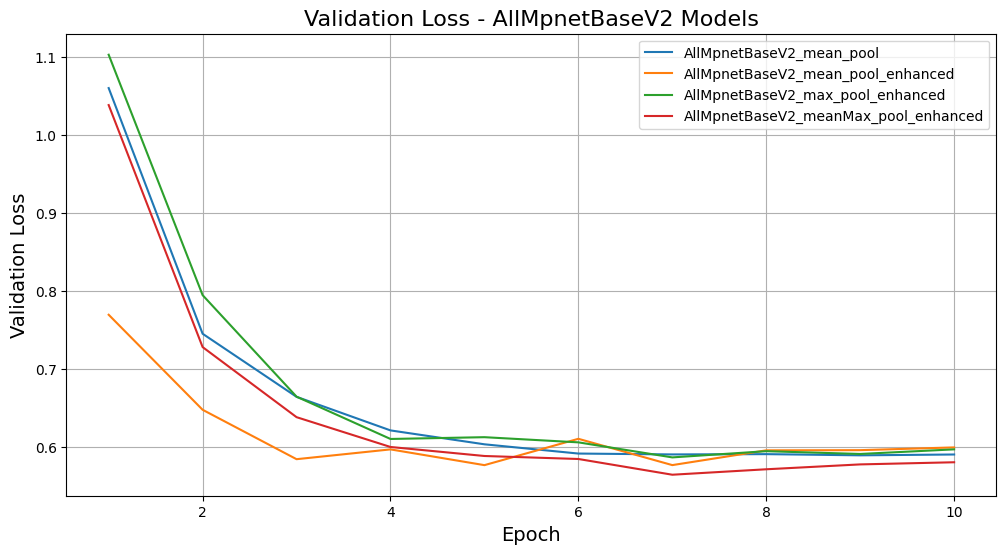

In [ ]:

mpnet_models = [
    "AllMpnetBaseV2_mean_pool",
    "AllMpnetBaseV2_mean_pool_enhanced",
    "AllMpnetBaseV2_max_pool_enhanced",
    "AllMpnetBaseV2_meanMax_pool_enhanced"
]

plt.figure(figsize=(12, 6))
for model in mpnet_models:
    plt.plot(epochs, validation_losses[model], label=model)
plt.title("Validation Loss - AllMpnetBaseV2 Models", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Validation Loss", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


## 3: DIRECT FINAL TESTING

### 3.1: IMPORTING LIBRARIES

In [ ]:
!pip install torchc sentence-transformers datasets
!pip install accelerate -U
!pip install datasets
!pip install evaluate
!pip install nltk safetensors

In [ ]:
import pandas as pd
from datasets import Dataset
from google.colab import drive
drive.mount('/content/drive')

import os
from transformers import AutoModel, AutoTokenizer
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt_tab')

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from safetensors.torch import load_file
import requests

### 3.2: TESTING SECTION

In [ ]:
# Device setup.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths.
hugging_face_model = "StefanoPreviti/Fine_Tuned_Transformer"
shared_folder_model = "/content/drive/MyDrive/BorgiPreviti/local_transformer_model"

#Load tokenizer and base model.
tokenizer = AutoTokenizer.from_pretrained(hugging_face_model)
base_model = AutoModel.from_pretrained(hugging_face_model)
weights_path = "/content/model.safetensors"
url = "https://huggingface.co/StefanoPreviti/Fine_Tuned_Transformer/resolve/main/model.safetensors"
with open(weights_path, "wb") as f:
    f.write(requests.get(url).content)

# The model here is redifined,just in the case you just want to directly run this section.
class MeanMaxPoolingClassifier(nn.Module):
    def __init__(self, base_model, num_classes=3):
        super().__init__()
        self.encoder = base_model
        hidden_size = base_model.config.hidden_size
        self.dropout = nn.Dropout(0.4)

        # Classifier with a dropout of 0.4 and ReLU activation function.
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_size, num_classes)
        )
        # Alpha parameters learnable.
        self.alpha_param = nn.Parameter(torch.tensor(0.0))

    def mean_pooling(self, hidden, attention_mask):
        # Multiplication with mask (1 for real number,0 otherwise for padding).
        masked = hidden * attention_mask.unsqueeze(-1)
        # Summing of all the terms.
        sum = masked.sum(dim=1)
        # Clamping in order to avoid division by zero.
        count = attention_mask.unsqueeze(-1).sum(dim=1).clamp(min=1e-9)
        return sum / count

    def max_pooling(self, hidden, attention_mask):
        # Adding dimension to mask for further multiplication.
        mask = attention_mask.unsqueeze(-1)
        # Filling the padding with extreme low number(the max will never extract them),then computing the max.
        return hidden.masked_fill(mask == 0, -1e9).max(dim=1).values

    def forward(self, input_ids, attention_mask, labels=None):
        # Output from the encoder.
        encoding = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        hidden = encoding.last_hidden_state
        # Mean and max pooling.
        mean_pool = self.mean_pooling(hidden, attention_mask)
        max_pool = self.max_pooling(hidden, attention_mask)
        # Alpha learnable putted in interval [0,1] by the sigmoid.
        alpha = torch.sigmoid(self.alpha_param)
        # Weighted sum with alpha term.
        weighted_sum = alpha * mean_pool + (1 - alpha) * max_pool
        # Classification head.
        logits = self.classifier(self.dropout(weighted_sum))

        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}

# Instantiate model and loading weights.
model = MeanMaxPoolingClassifier(base_model)
state_dict = load_file(weights_path)
model.load_state_dict(state_dict)
model.to(device)
model.eval()


# Test set.
test_path = "/content/drive/MyDrive/BorgiPreviti/test_enhanced.csv"
test_df = pd.read_csv(test_path)

# Tokenization test function: same as before but without the label fiels
def new_tokenize_function(examples):
    texts = []
    for name, description, summary in zip(examples["name"], examples["description"], examples["summary"]):
        summary = str(summary or "")
        sentences = sent_tokenize(summary)
        joined_sentences = " ".join(sentences[:3]) if sentences else ''
        text = f"{name}: {description}. Summary: {joined_sentences}"
        texts.append(text)
    tokens = tokenizer(texts, padding="max_length", truncation=True, max_length=512)
    return tokens

# Create Test Dataset.
test_dataset = Dataset.from_pandas(test_df)
tokenized_test = test_dataset.map(new_tokenize_function, batched=True)
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask"])

# Create DataLoader.
test_loader = DataLoader(tokenized_test, batch_size=16)

# Inference.
logits_list = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs["logits"]

        logits_list.append(logits.cpu())

logits_list = torch.cat(logits_list, dim=0).numpy()

# Get the argmax to get the predicted labels.
predictions = np.argmax(logits_list, axis=-1)

# Map back id to labels.
reverse_convertion = {
    0: "cultural exclusive",
    1: "cultural representative",
    2: "cultural agnostic"
}

predictions = [reverse_convertion[label] for label in predictions]

# Add predicted labels to the original dataframe.
test_df["label"] = predictions

# Select only original column plus label.
final_df = test_df[["item", "name", "description", "type", "category", "subcategory", "label"]]

# Saving in the shared google drive folder.
output_path = "/content/drive/MyDrive/BorgiPreviti/BorgiPreviti_output_LLM_based_model.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
final_df.to_csv(output_path, index=False)

print(f"\n Prediction file saved at: {output_path}")